# Python Standard Library Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from analysis_utils import add_complexity_to_metadata, prepare_std_lib_treemap_data, create_std_lib_treemap, plot_usage_in_files, plot_usage_within_files, plot_mean_complexity

In [2]:
metadata = pd.read_parquet('/workspaces/repos/randomstats/github/metadata.parquet').dropna()
metadata = add_complexity_to_metadata(metadata)
metadata

calls  assignments  attributes  \
chunk_id                                                                   
4444d3cdff850ebe6ce372c7b867141a2d041f11   31.0         18.0        24.0   
92eea3f82b5e926c9a8d6568a2b3eb351199bf9e    3.0          2.0         4.0   
d8108f44778865705e71acaf17442a499afbc5d0    0.0          1.0         0.0   
e66ae67333542402587a359a3a84554c27444aad    6.0          6.0         4.0   
1d6cb5c0c1a8f8d441bb85db936dd202ae3dc58f    6.0          4.0        13.0   
...                                         ...          ...         ...   
79e8c8fcb9d1293b01a25327c5193a3ec2149dd7    8.0          5.0         5.0   
55d9448fc5f4015cf76f7246de39ce8424870ee0    0.0          0.0         0.0   
8bd51a5a60142e8e839697d0ead4cdaa2a16d64c   39.0         14.0        79.0   
791f8251863b3a09b1cf8f4d16e56933b0830e39   35.0         26.0        24.0   
5c2402c51df4f30da18b00dcbfd8d1899348d48a   23.0          6.0        18.0   

                                            size is_ipynb  complexity  
chunk_id                                                               
4444d3cdff850ebe6ce372c7b867141a2d041f11  2176.0    False    0.172107  
92eea3f82b5e926c9a8d6568a2b3eb351199bf9e   590.0    False    0.024374  
d8108f44778865705e71acaf17442a499afbc5d0  2278.0    False    0.031695  
e66ae67333542402587a359a3a84554c27444aad   886.0    False    0.046665  
1d6cb5c0c1a8f8d441bb85db936dd202ae3dc58f   876.0    False    0.051324  
...                                          ...      ...         ...  
79e8c8fcb9d1293b01a25327c5193a3ec2149dd7   540.0    False    0.043811  
55d9448fc5f4015cf76f7246de39ce8424870ee0  3984.0     True    0.049601  
8bd51a5a60142e8e839697d0ead4cdaa2a16d64c  3727.0    False    0.262118  
791f8251863b3a09b1cf8f4d16e56933b0830e39  6548.0    False    0.260235  
5c2402c51df4f30da18b00dcbfd8d1899348d48a  2633.0    False    0.116104  

[7484750 rows x 6 columns]

In [3]:
libraries = pd.read_parquet('/workspaces/repos/randomstats/github/library_counts.parquet')
libraries

chunk_id library_name  \
0       284c4fa678838e17f66eed0db60ea67353fad38d         math   
1       284c4fa678838e17f66eed0db60ea67353fad38d     warnings   
2       89c3b09cdaa74e55dc6241088e690a7cbf0dfe10       ctypes   
3       89c3b09cdaa74e55dc6241088e690a7cbf0dfe10       ctypes   
4       89c3b09cdaa74e55dc6241088e690a7cbf0dfe10       ctypes   
...                                          ...          ...   
125612  738e07780b1324c00aba152966305aaa0cc53ca4           os   
125613  738e07780b1324c00aba152966305aaa0cc53ca4          pdb   
125614  641836419114f68ecc105425ade25cd7813979a4           os   
125615  641836419114f68ecc105425ade25cd7813979a4         site   
125616  0cd9ae3f7372a72618bf2966d1b8c75c618feb1d         math   

              component_type   component  count  
0       from_import_function        ceil      2  
1                   function        warn      1  
2                      class      c_byte      2  
3                      class        CDLL      2  
4                      class    c_void_p     47  
...                      ...         ...    ...  
125612             attribute        path      1  
125613  from_import_function          pm      1  
125614             attribute        path      7  
125615              function  addsitedir      1  
125616              function       atan2      2  

[18056061 rows x 5 columns]

In [4]:
py_ids = metadata[metadata['is_ipynb'] == False].index
ipynb_ids = metadata[metadata['is_ipynb'] == True].index

libraries_py = libraries[libraries['chunk_id'].isin(py_ids)]
libraries_ipynb = libraries[libraries['chunk_id'].isin(ipynb_ids)]

## Most Commonly Used Libraries and Their Components

### By Number of Files They Were Used in

#### Top Libraries

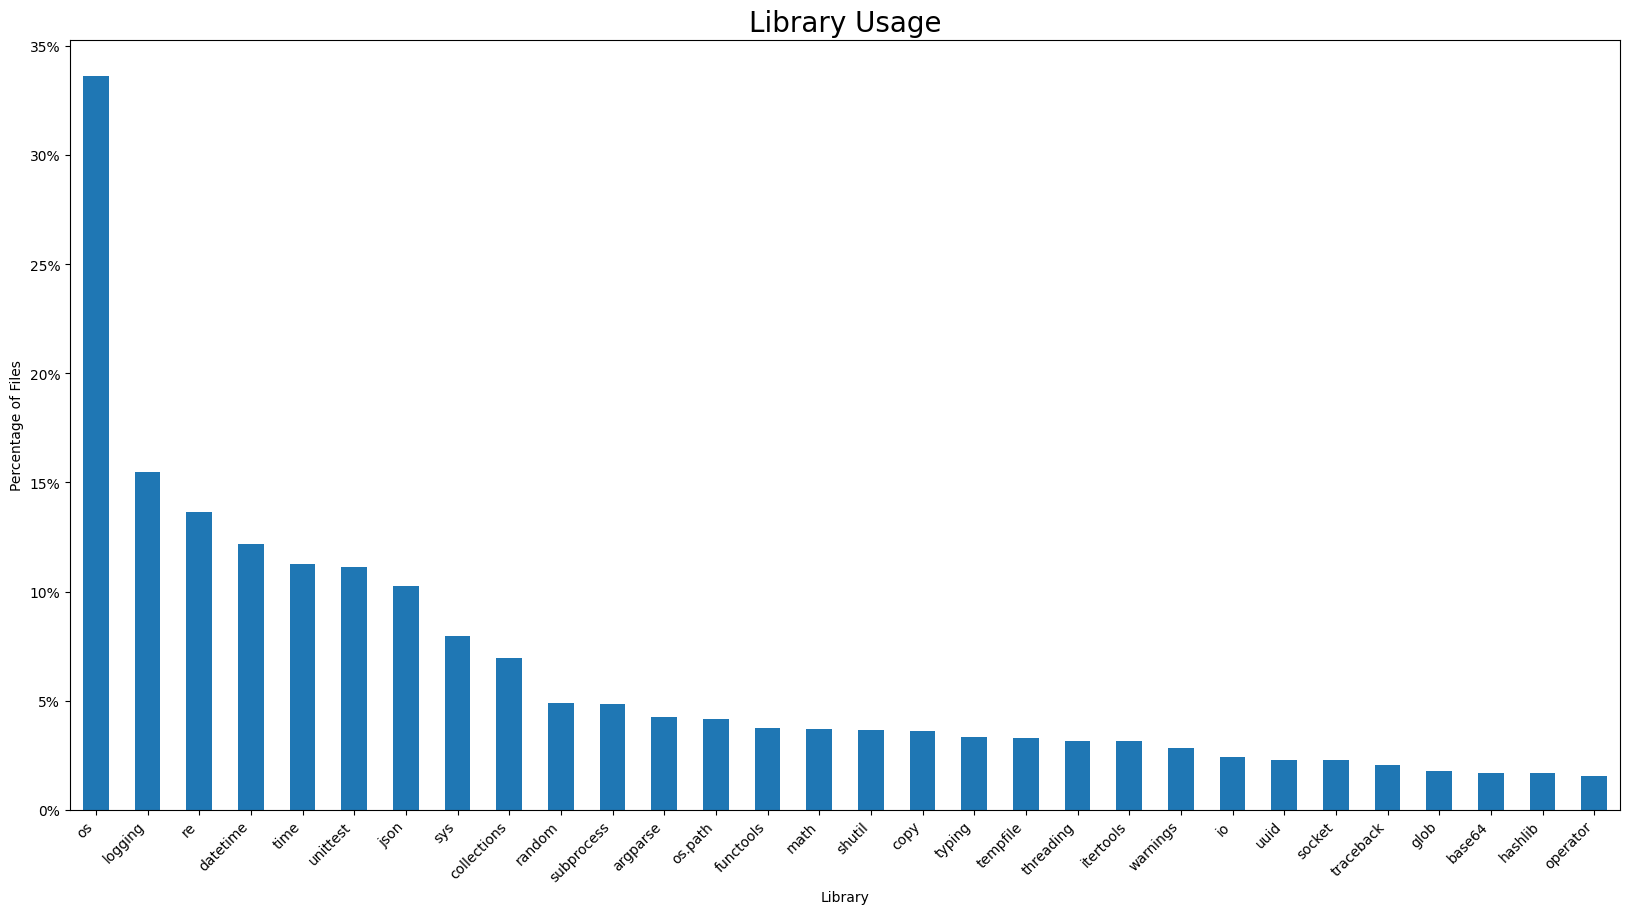

In [5]:
plot_usage_in_files(libraries, top_n=30)

#### Top os Components

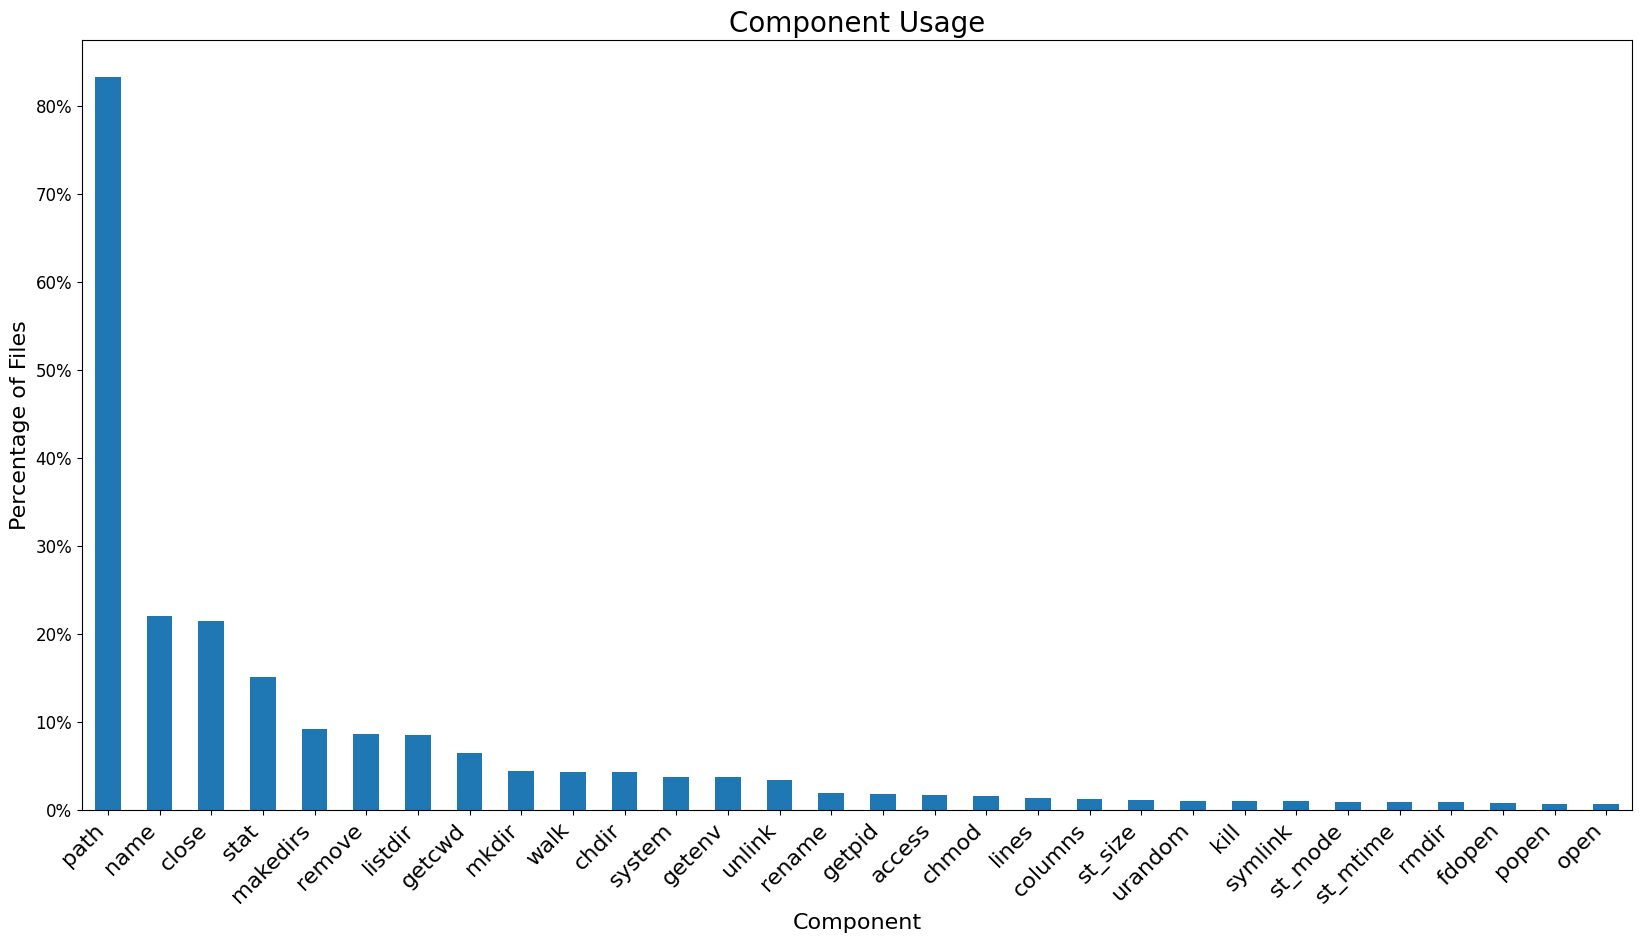

In [6]:
plot_usage_in_files(libraries, library_name='os', top_n=30)

#### Top logging Components

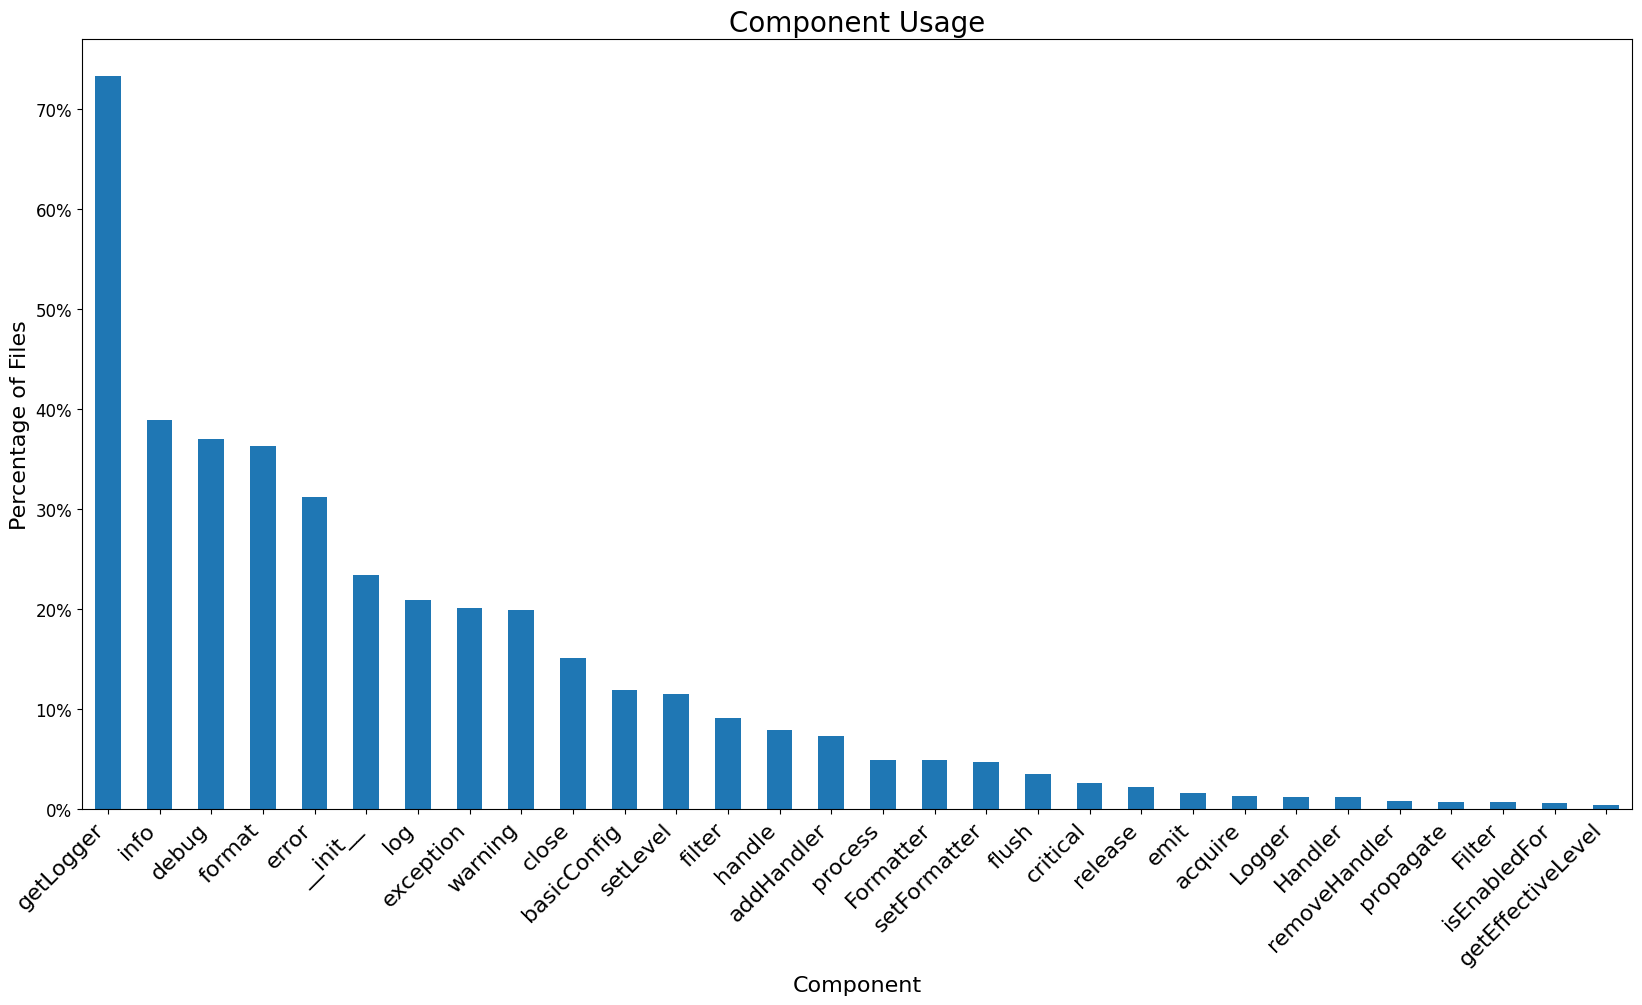

In [7]:
plot_usage_in_files(libraries, library_name='logging', top_n=30)

#### Top re Components

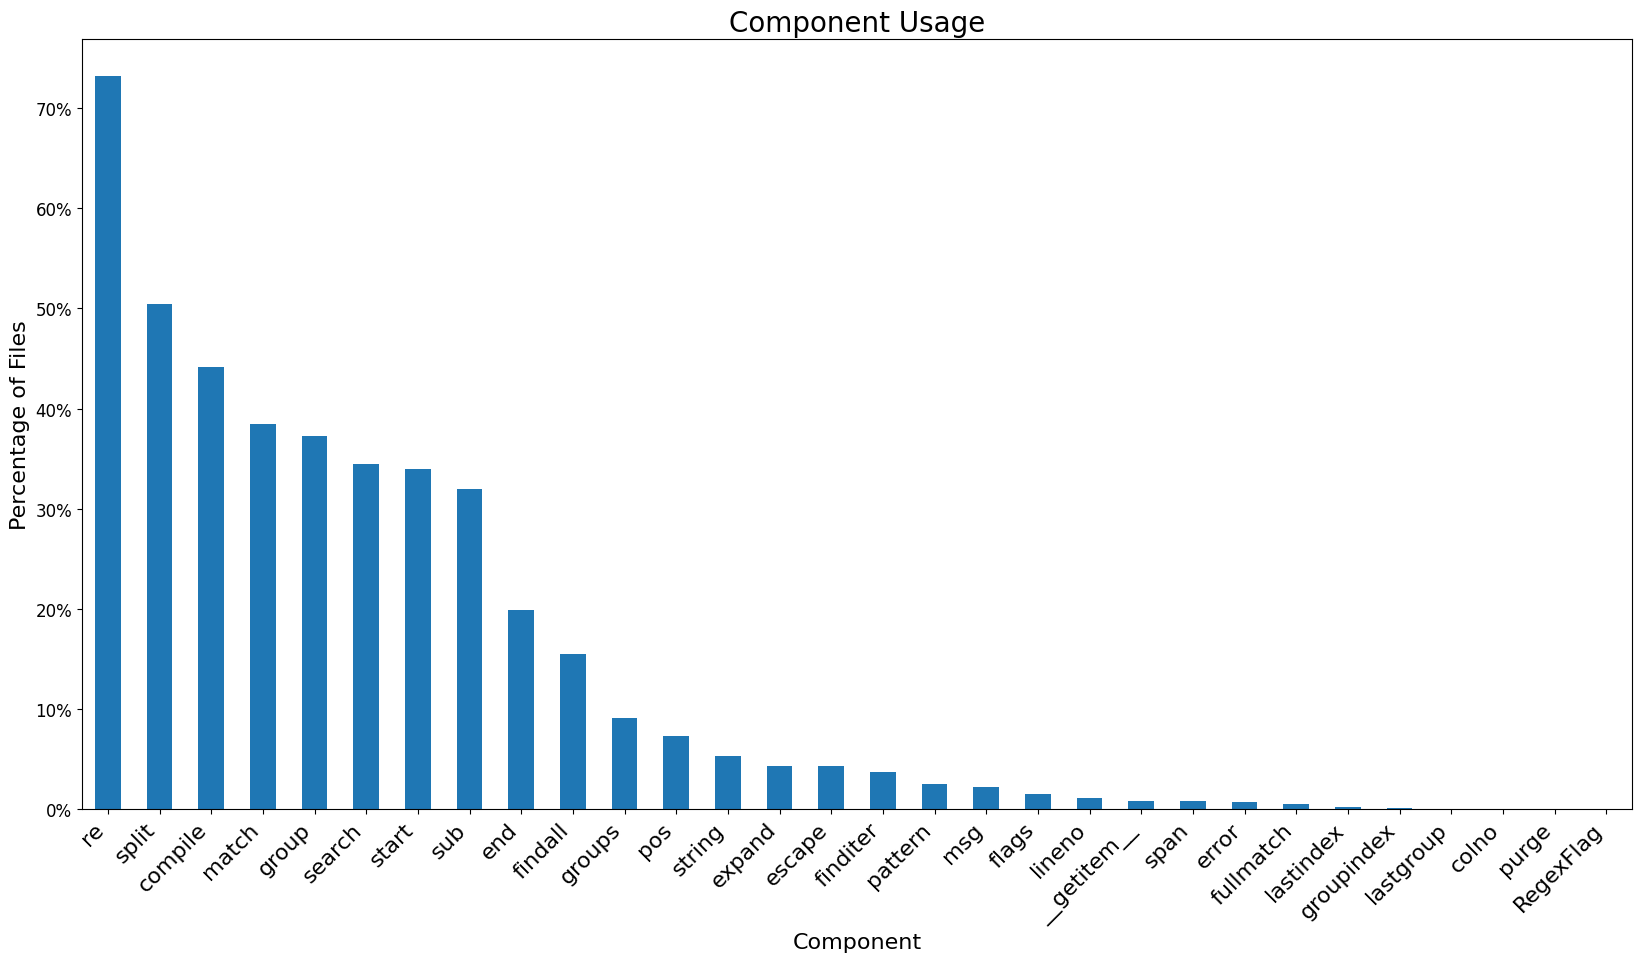

In [8]:
plot_usage_in_files(libraries, library_name='re', top_n=30)

#### Top re Functions

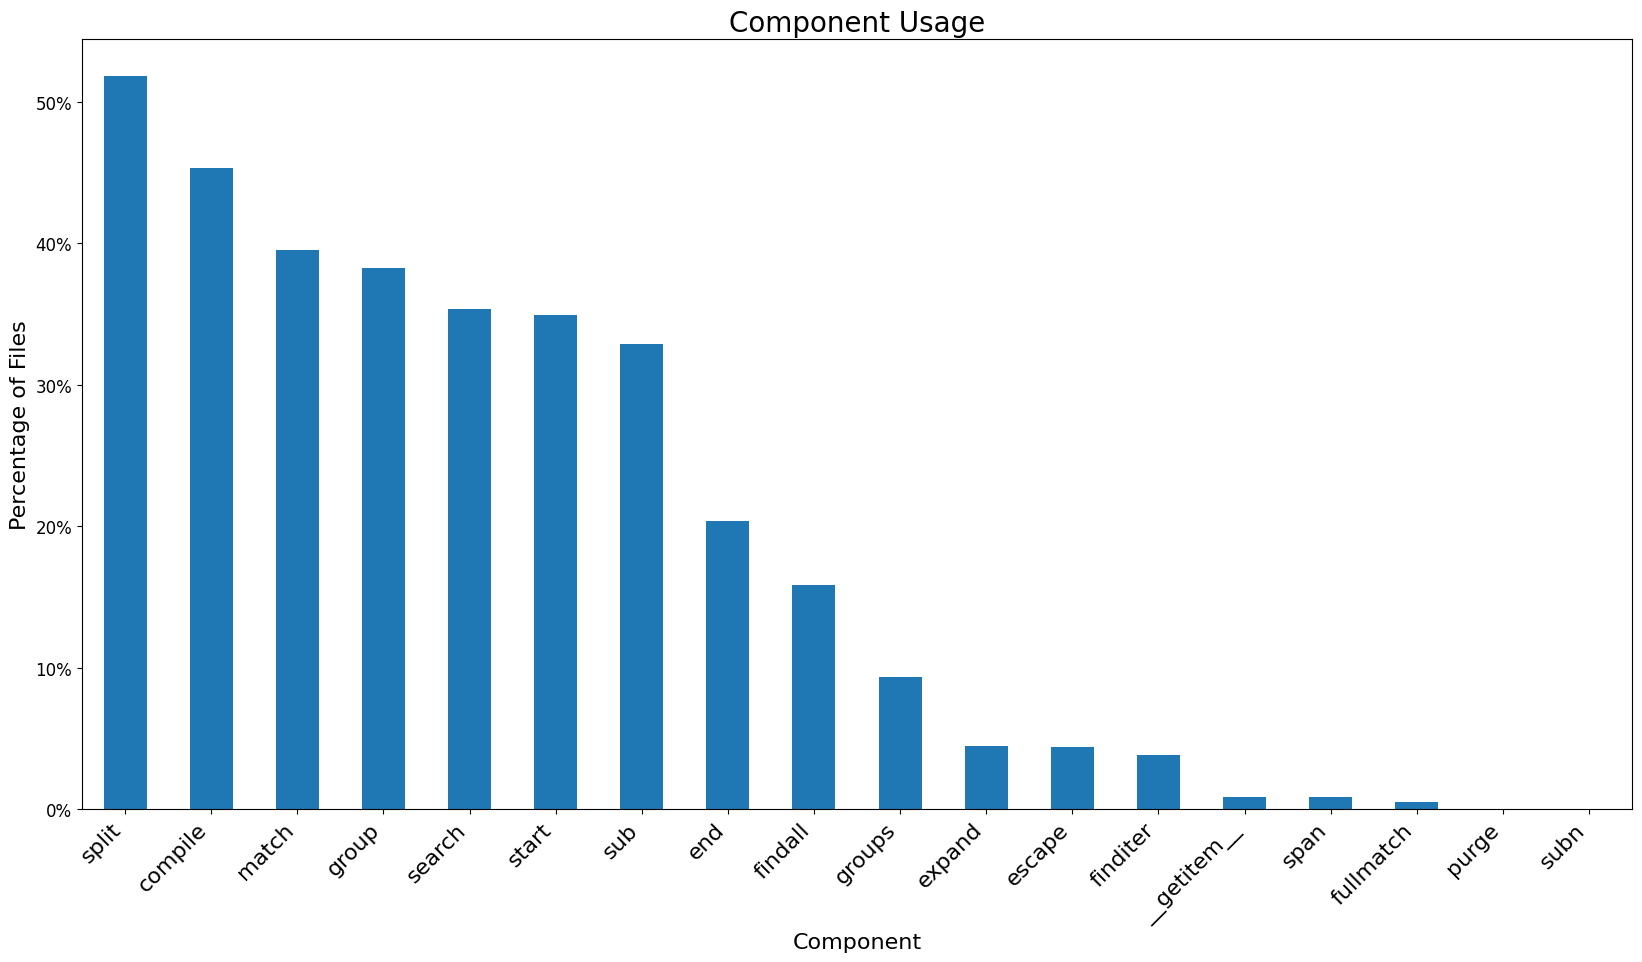

In [9]:
plot_usage_in_files(libraries, library_name='re', top_n=18, component_types=['function', 'from_import_function', 'method', 'from_import_method'])

#### Top datetime Components

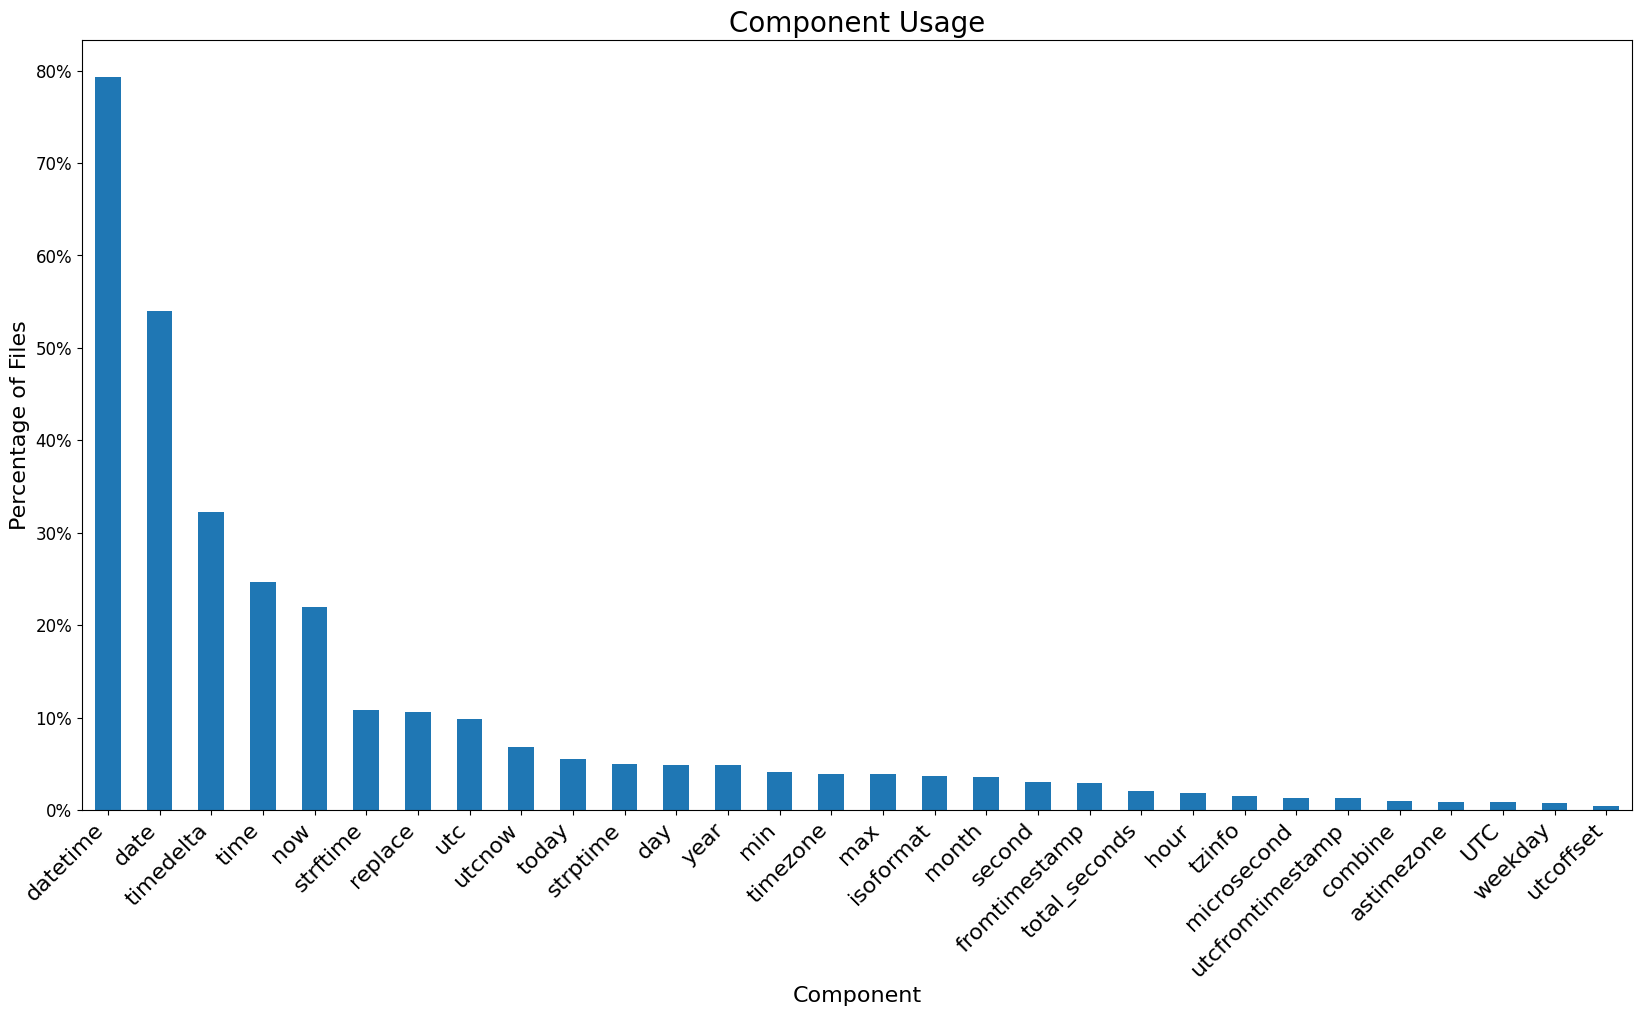

In [10]:
plot_usage_in_files(libraries, library_name='datetime', top_n=30)

#### Top time components

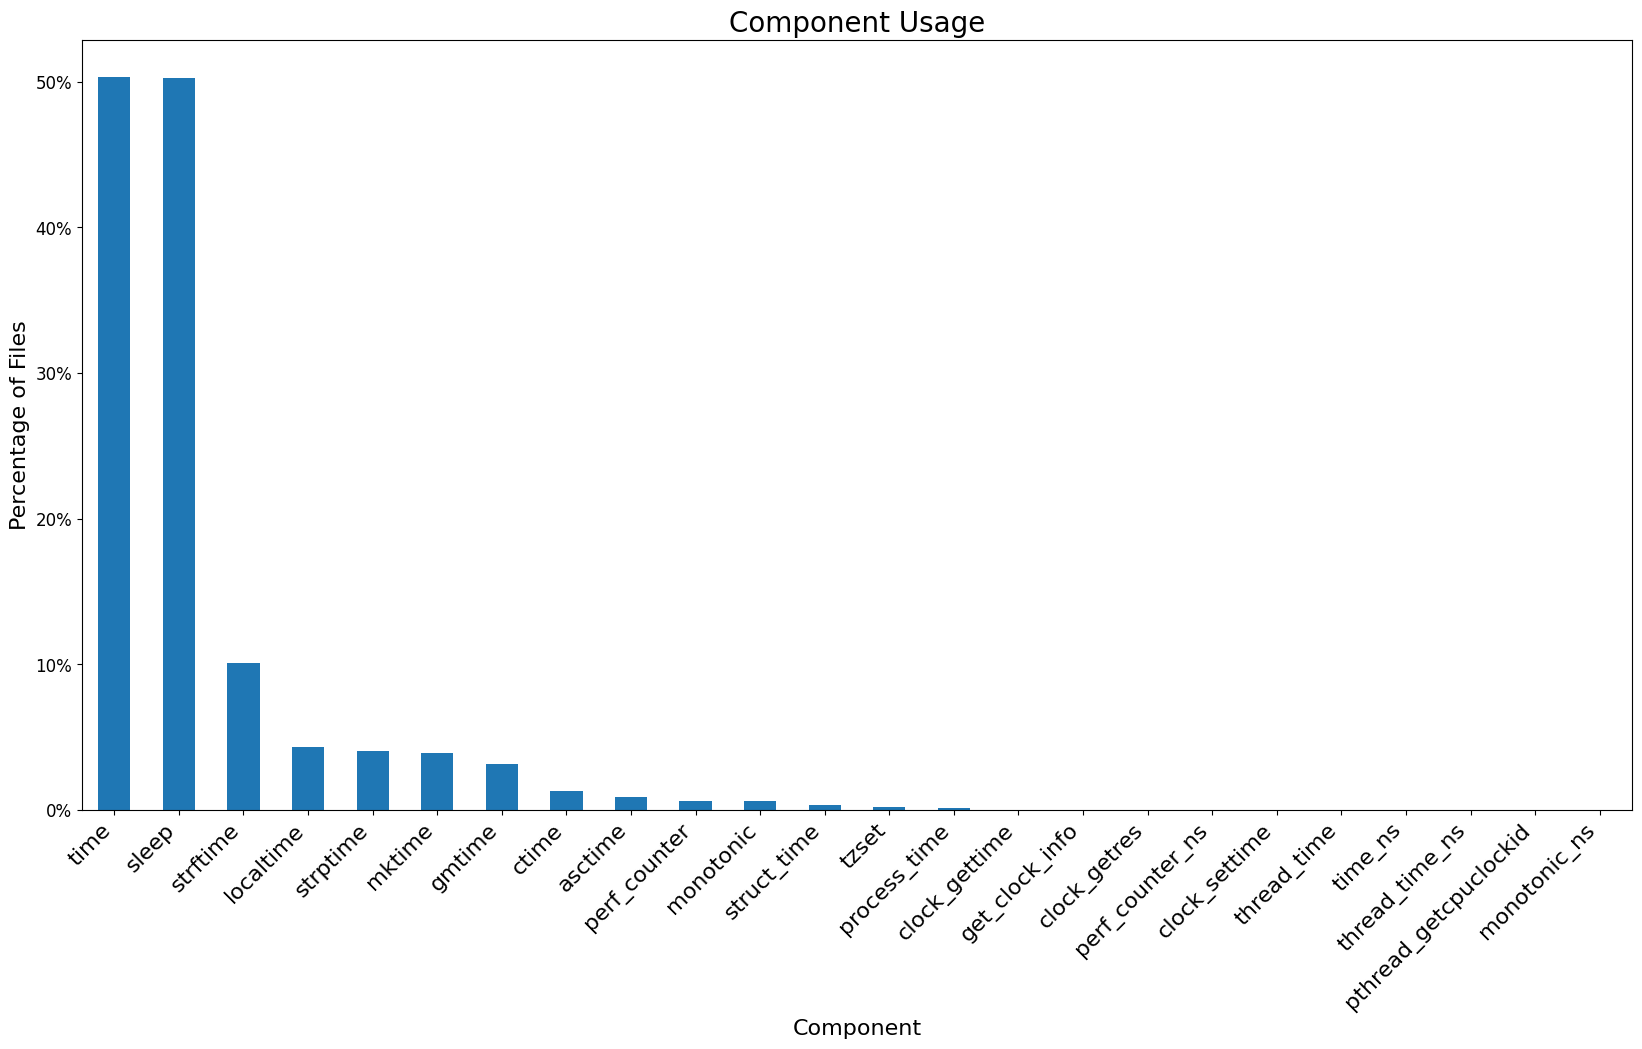

In [11]:
plot_usage_in_files(libraries, library_name='time', top_n=30)

#### Top unittest Components

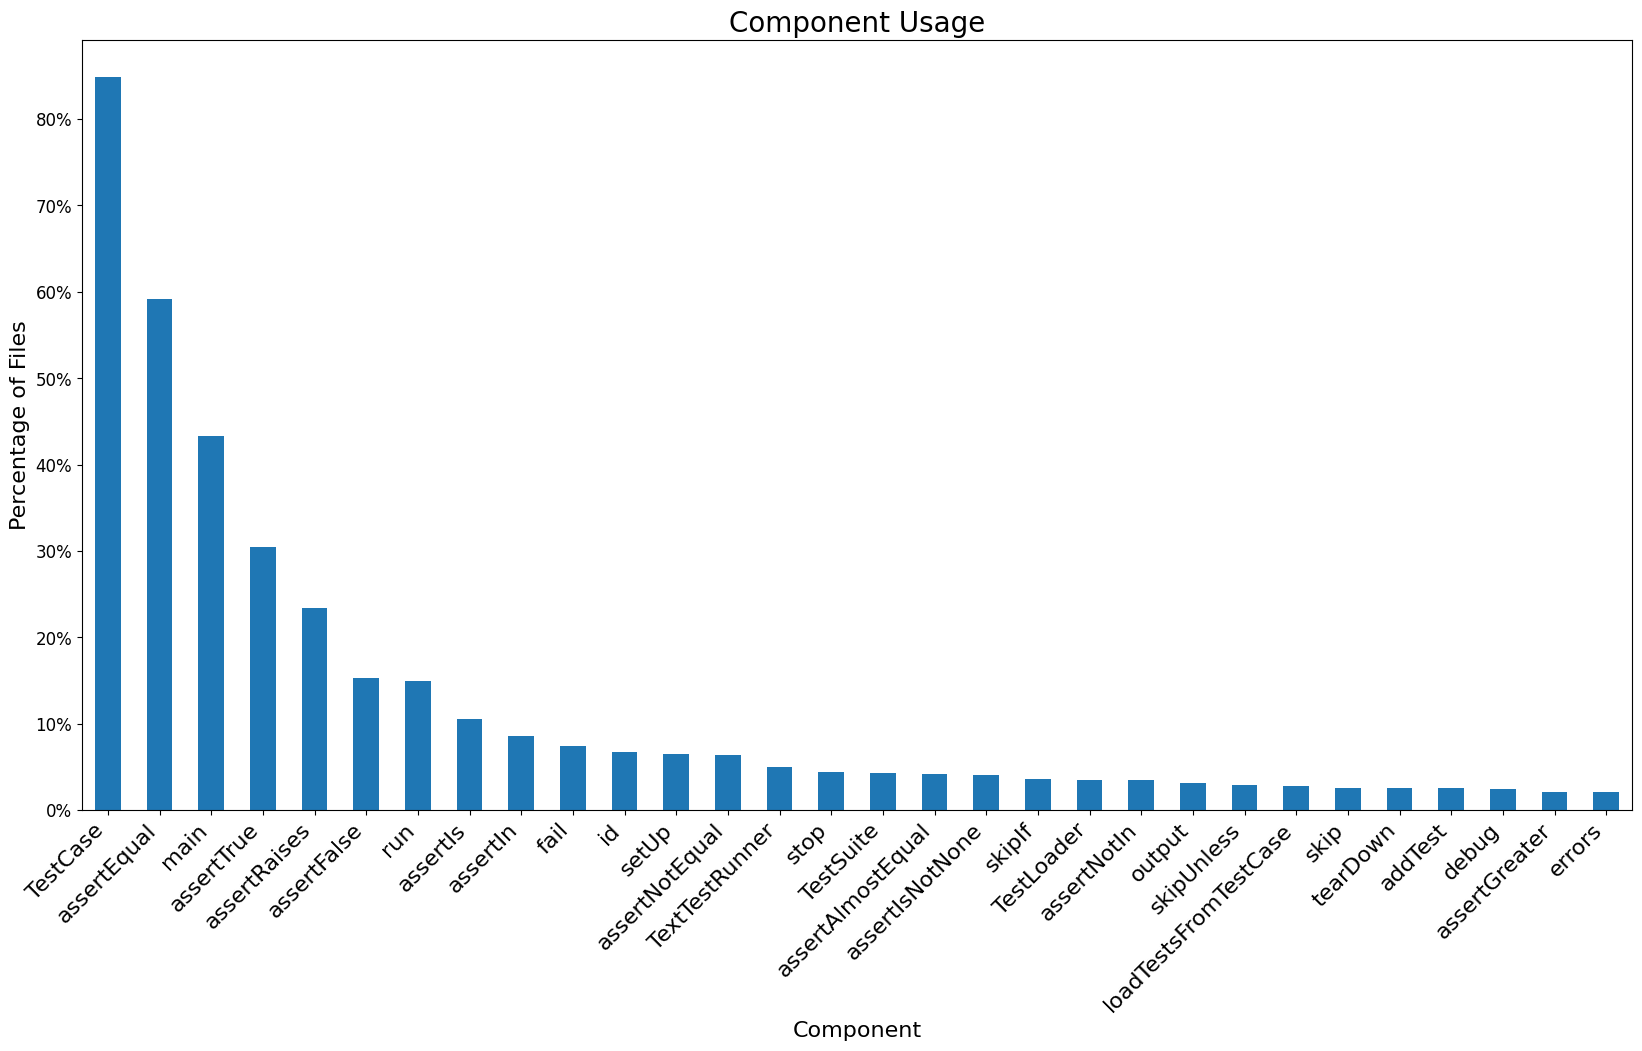

In [12]:
plot_usage_in_files(libraries, library_name='unittest', top_n=30)

#### Top json Components

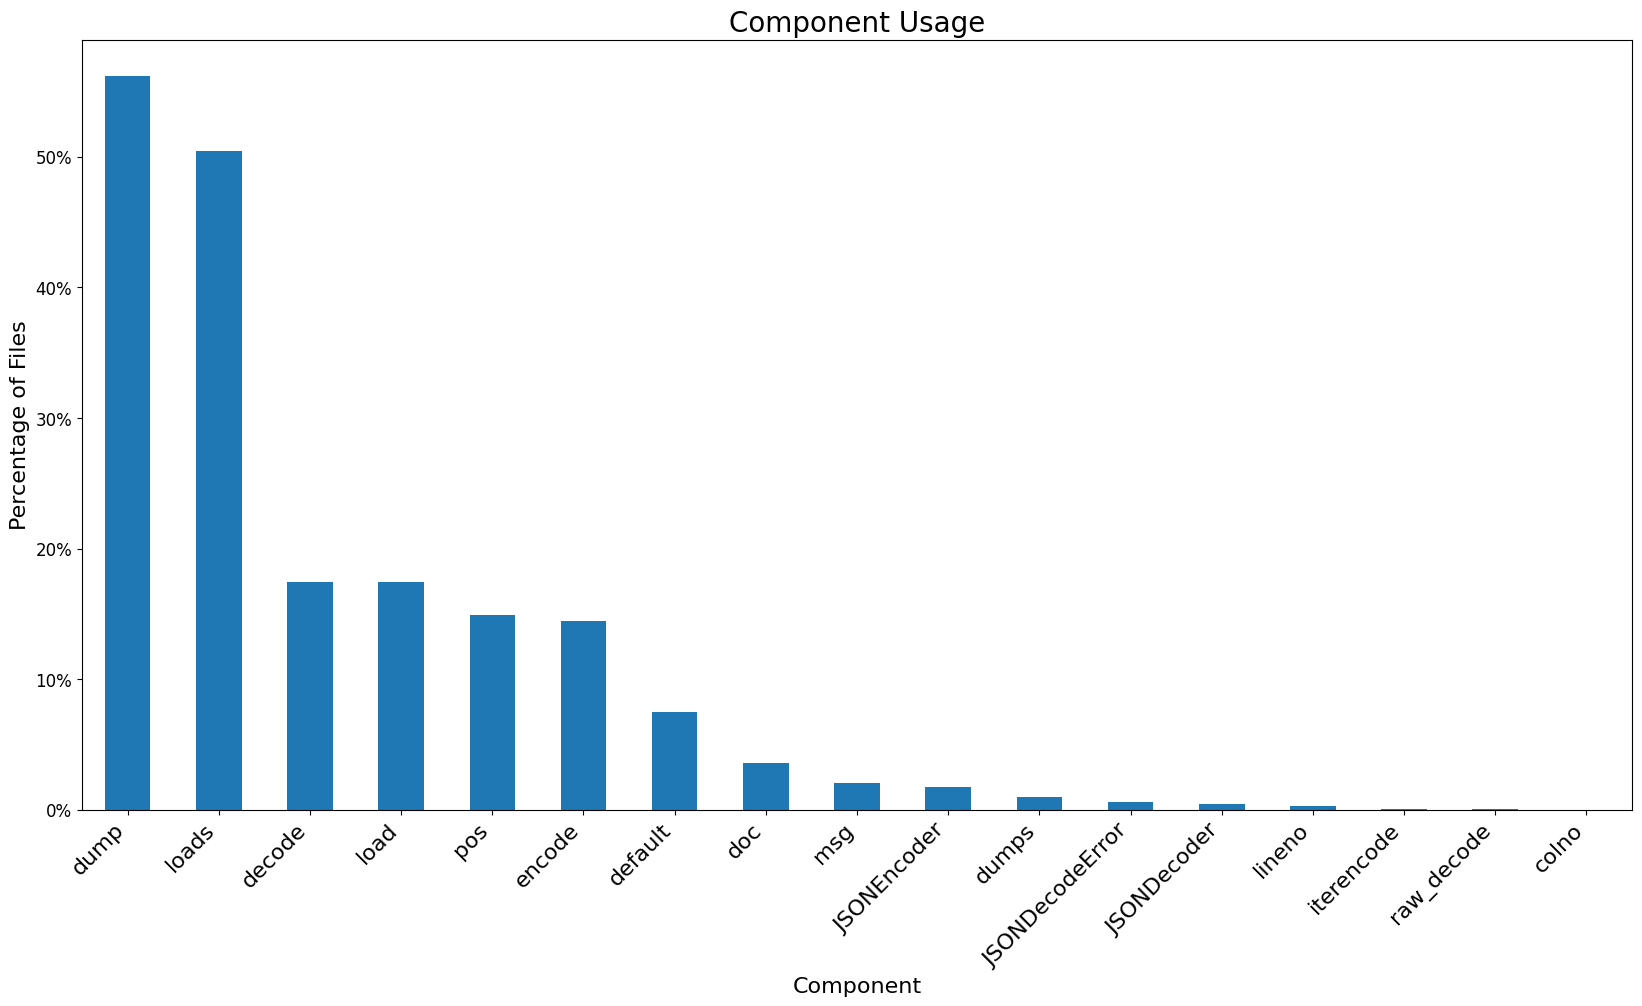

In [13]:
plot_usage_in_files(libraries, library_name='json', top_n=30)

#### Top json Functions

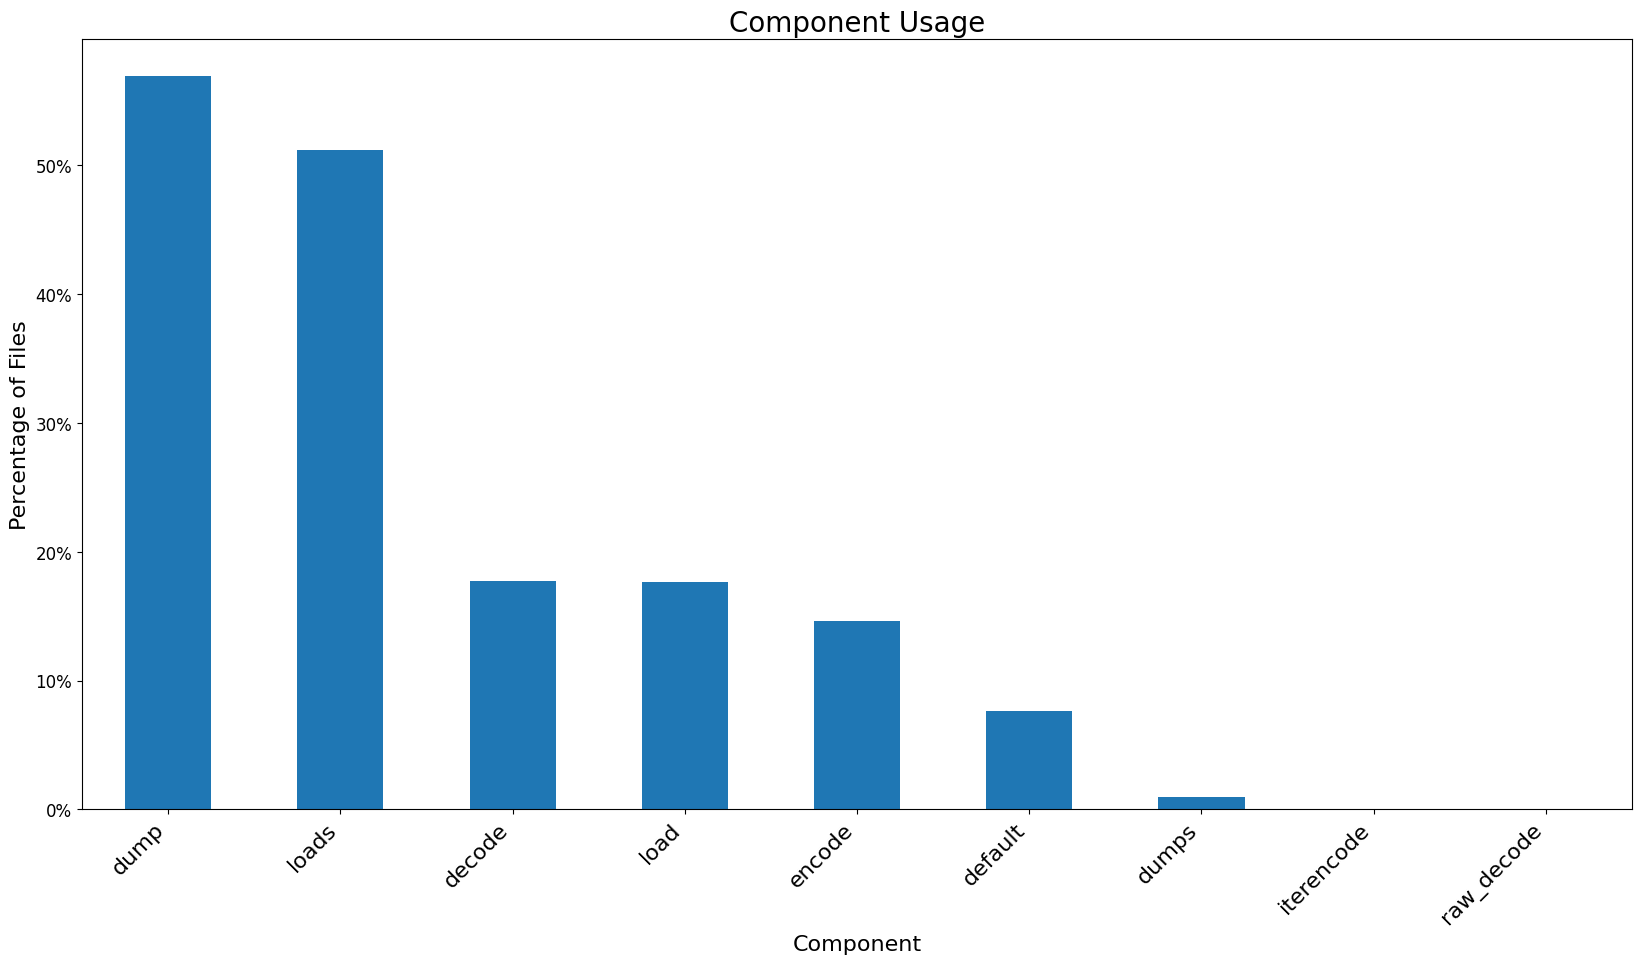

In [14]:
plot_usage_in_files(libraries, library_name='json', top_n=30, component_types=['function', 'from_import_function', 'method', 'from_import_method'])

### By Number of Their Components Usage

In [15]:
df = libraries[['library_name', 'component_type', 'component', 'count']]
df_grouped = df.groupby(['library_name', 'component_type'])['count'].sum().reset_index()
df_pivot = df_grouped.pivot(index='library_name', columns='component_type', values='count').fillna(0).astype(int)
df_pivot['all_components'] = df_pivot.sum(axis=1)
columns_with_from_import = [col for col in df_pivot.columns if 'from_import' in col]
columns_without_from_import = [col for col in df_pivot.columns if 'from_import' not in col and col != 'all_components']
sorted_columns = ['all_components'] + sorted(columns_without_from_import) + sorted(columns_with_from_import)
df_pivot = df_pivot.reindex(sorted_columns, axis=1)
df_sorted = df_pivot.sort_values('all_components', ascending=False)

In [16]:
df_sorted.head(50)

component_type         all_components  attribute   class  exception  function  \
library_name                                                                    
os                           10336370    6990569    2910       4667   1551778   
unittest                      9175504     112813  507738       7999    229315   
re                            8514570    3209901      70       5995   1349108   
logging                       6805991       5879   60291          0   1062875   
datetime                      4506318     438891  754423          0         0   
json                          1688985     391284    9716       1981    907038   
threading                     1530820     183843  176859        190     10857   
collections                   1484301      90049   82680          0     30907   
ctypes                        1287061     130028  238717        352     94672   
argparse                      1240415          0  159320          0         0   
time                          1217957          0    1838          0    981814   
typing                        1113545       3612   50917          0      2717   
subprocess                    1030862     413562  116502      32557    183976   
struct                         972777     134911   10127      13573    319153   
io                             923506     195677   88466       1699     27977   
socket                         885323      47904   94483      55122     69795   
os.path                        856853          0       0          0    503060   
xml.etree.ElementTree          798467     163643   42717          0    141133   
math                           628739          0       0          0    394531   
traceback                      616836      89487     420          0    122110   
sys                            557172          0       0          0    542371   
random                         496583          0   11689          0    365880   
multiprocessing                470704      32494   18270        214     13825   
codecs                         440154     115979    6669          0     52704   
inspect                        438718     277186    6270          0     99258   
types                          438023      48545   10221          0       981   
functools                      414767      82120     507          0    108749   
uuid                           412839     166037   24489          0    172427   
sqlite3                        362217      16878    5074       8875     26351   
unittest.mock                  345158      16259    8686          0     13513   
zipfile                        341482      99540   30376       1530      2479   
copy                           328723          0       0        109    198820   
hashlib                        318275     110591       0          0      4466   
warnings                       278173          0   43632          0    200634   
itertools                      265484          0       0          0    104289   
shutil                         264450          7       0       1660    226427   
abc                            253434          0   27018          0     91771   
pickle                         253033       1081    1420       1858     93401   
decimal                        234633          0   29287          0       674   
pprint                         217857          0    2667          0     23172   
string                         217458       9929   11417          0       857   
tempfile                       212538          0   12021          0    153519   
pathlib                        211430      29568   21836          0         0   
configparser                   211065         30   11853       4129         0   
ast                            205507      12927  134567          0     23530   
tarfile                        192497      46540    3712       1512     17382   
operator                       188231          0       0          0    100192   
urllib.request                 

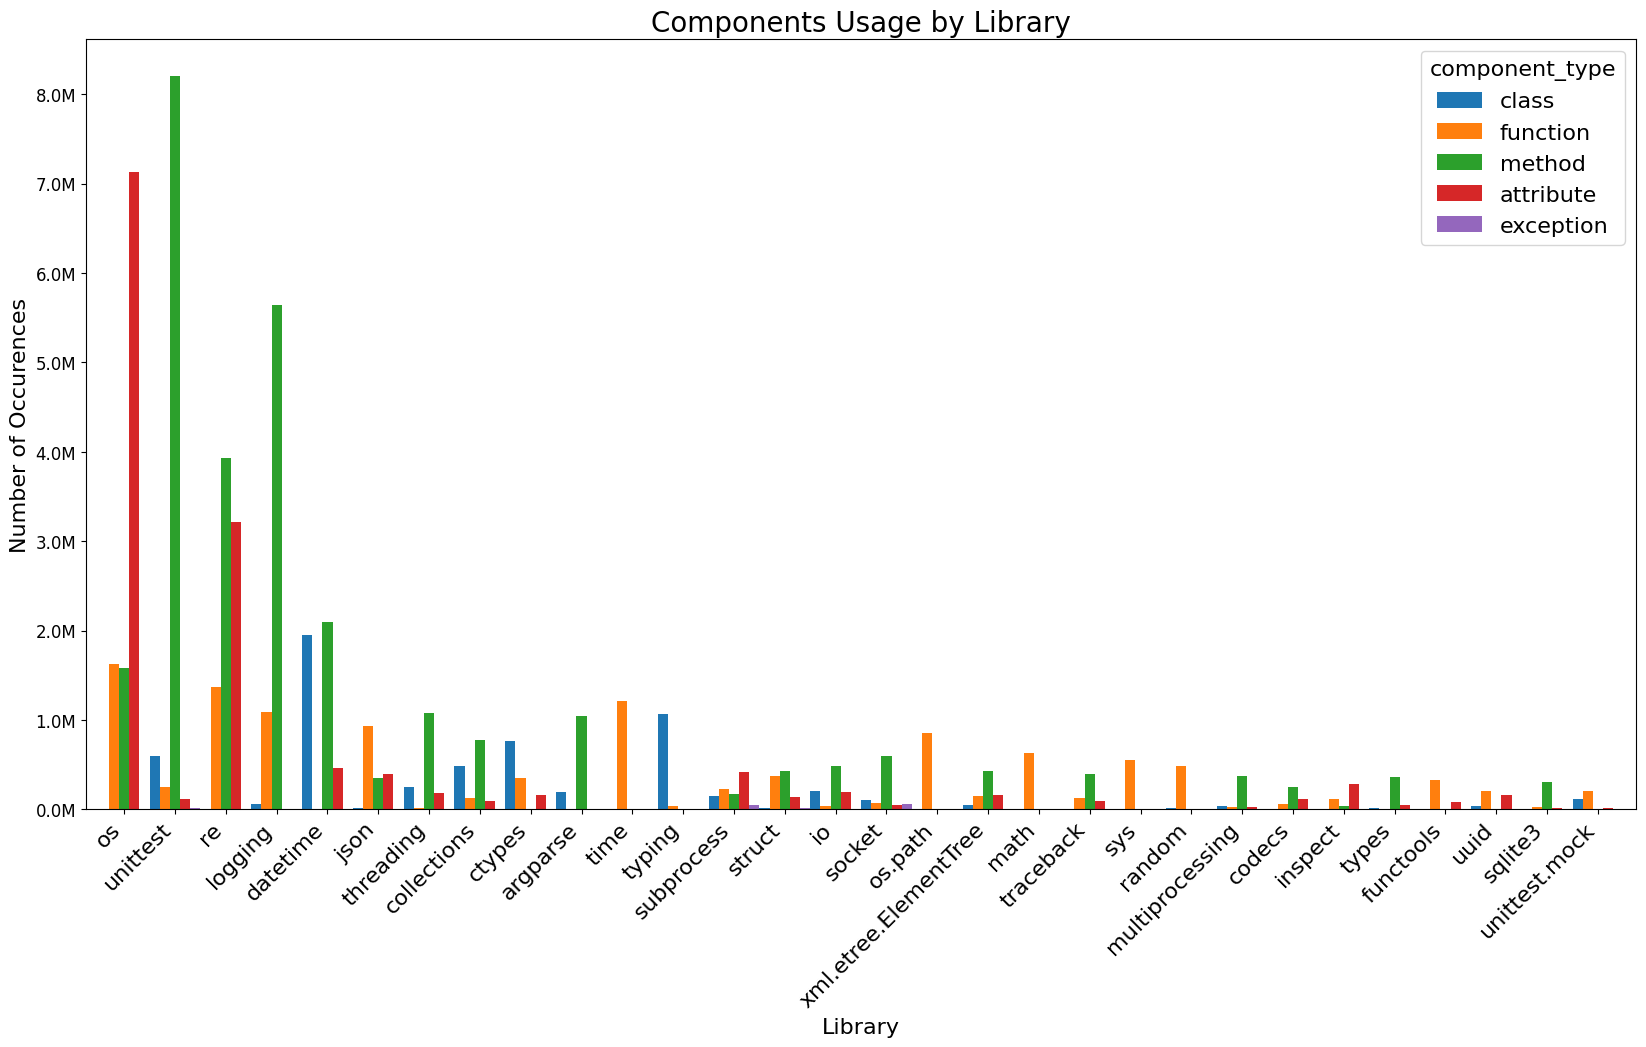

In [17]:
plot_usage_within_files(df_sorted, ['class', 'function', 'method', 'attribute', 'exception'], top_n=30, number_format='M')

In [18]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

def create_std_lib_treemap(component_usage, title, width=1200, height=1200, text_size=18):
    """
    Create a treemap visualization of standard library usage.
    
    Args:
        component_usage (pd.DataFrame): The DataFrame containing the prepared data for the treemap.
        title (str): The title of the treemap.

    Returns:
        None: The function displays the treemap using Plotly.
    """
    hovertemplate = "%{label}<br>Count: %{customdata[0]}<br>Share of library: %{customdata[1]:.2f}%<br>Share of all: %{customdata[2]:.2f}%"

    fig = px.treemap(
        component_usage,
        path=['library_name', 'component'],
        values='count',
        color='library_percentage',
        custom_data=['count', 'library_percentage', 'total_percentage'],
        title=title,
        color_continuous_scale='RdBu',
        labels={'library_name': 'Library',
                'component': 'Component',
                'count': 'Count'}
    )
    
    fig.update_traces(hovertemplate=hovertemplate, textinfo='label+value+percent parent')

    fig.update_layout(
        width=width,
        height=height,
        uniformtext=dict(minsize=text_size, mode='show'),
        title={
            'text': title,
            'font': {'size': 30},
            'x': 0.5,
            'y': 0.98,
            'xanchor': 'center',
            'yanchor': 'top'
        },
        margin=dict(l=10, r=10, t=100, b=10)
    )
    fig.show()

#### Components in All Files

In [19]:
component_usage_sum = prepare_std_lib_treemap_data(libraries, threshold=0.003)
create_std_lib_treemap(component_usage_sum, "Python Standard Library Modules Usage", width=1800, height=1400, text_size=10)

#### Components in .py Files

In [20]:
component_usage_sum = prepare_std_lib_treemap_data(libraries_py)
create_std_lib_treemap(component_usage_sum, "Python Standard Library Components Usage in .py Files", width=1800, height=1400, text_size=10)

#### Components in .ipynb files

In [21]:
component_usage_sum = prepare_std_lib_treemap_data(libraries_ipynb)
create_std_lib_treemap(component_usage_sum, "Python Standard Library Components Usage in .ipynb Files", width=1800, height=1400, text_size=10)

#### Components in Files with os

In [22]:
os_module = libraries_py[libraries_py['library_name'] == 'os']
component_usage_sum = prepare_std_lib_treemap_data(os_module, threshold=0.001)
create_std_lib_treemap(component_usage_sum, "os Component Usage", width=1800, height=1400, text_size=10)

#### Components in Files with unittest

In [23]:
unittest_module = libraries_py[libraries_py['library_name'] == 'unittest']
component_usage_sum = prepare_std_lib_treemap_data(unittest_module, threshold=0.001)
create_std_lib_treemap(component_usage_sum, "unittest Component Usage", width=1800, height=1400, text_size=10)

#### Components in Files with re

In [24]:
re_module = libraries_py[libraries_py['library_name'] == 're']
component_usage_sum = prepare_std_lib_treemap_data(re_module, threshold=0.001)
create_std_lib_treemap(component_usage_sum, "re Component Usage", width=1800, height=1400, text_size=10)

#### Components in Files with logging

In [25]:
logging_module = libraries_py[libraries_py['library_name'] == 'logging']
component_usage_sum = prepare_std_lib_treemap_data(logging_module, threshold=0.001)
create_std_lib_treemap(component_usage_sum, "logging Component Usage", width=1800, height=1400, text_size=10)

#### Components in Files with datetime

In [26]:
datetime_module = libraries_py[libraries_py['library_name'] == 'datetime']
component_usage_sum = prepare_std_lib_treemap_data(datetime_module, threshold=0.001)
create_std_lib_treemap(component_usage_sum, "datetime Component Usage", width=1800, height=1400, text_size=10)

#### Components in Files with json

In [27]:
json_module = libraries_py[libraries_py['library_name'] == 'json']
component_usage_sum = prepare_std_lib_treemap_data(json_module, threshold=0.001)
create_std_lib_treemap(component_usage_sum, "json Component Usage", width=1800, height=1400, text_size=10)

#### Components in Files with threading

In [28]:
threading_module = libraries_py[libraries_py['library_name'] == 'threading']
component_usage_sum = prepare_std_lib_treemap_data(threading_module, threshold=0.001)
create_std_lib_treemap(component_usage_sum, "threading Component Usage", width=1800, height=1400, text_size=10)

#### Components in Files with collections

In [29]:
collections_module = libraries_py[libraries_py['library_name'] == 'collections']
component_usage_sum = prepare_std_lib_treemap_data(collections_module, threshold=0.001)
create_std_lib_treemap(component_usage_sum, "collections Component Usage", width=1800, height=1400, text_size=10)

#### Classes in Files with collections

In [30]:
component_types = 'from_import_class', 'class'
collections_module = libraries_py[libraries_py['library_name'] == 'collections']
component_usage_sum = prepare_std_lib_treemap_data(collections_module, component_types, threshold=0.001)
create_std_lib_treemap(component_usage_sum, "collections Class Usage", width=1800, height=1400, text_size=10)

#### Components in Files with ctypes (blogpost version)

In [31]:
ctypes_module = libraries_py[libraries_py['library_name'] == 'ctypes']
component_usage_sum = prepare_std_lib_treemap_data(ctypes_module, threshold=0.01)
create_std_lib_treemap(component_usage_sum, "ctypes Component Usage")

#### Components in Files with shutil (blogpost version)

In [32]:
ctypes_module = libraries_py[libraries_py['library_name'] == 'shutil']
component_usage_sum = prepare_std_lib_treemap_data(ctypes_module, threshold=0.01)
create_std_lib_treemap(component_usage_sum, "shutil Component Usage")

#### Components in Files with os (blogpost version)

In [33]:
ctypes_module = libraries_py[libraries_py['library_name'] == 'os']
component_usage_sum = prepare_std_lib_treemap_data(ctypes_module, threshold=0.01)
create_std_lib_treemap(component_usage_sum, "os Component Usage")

#### Components in Files with unittest (blogpost version)

In [34]:
ctypes_module = libraries_py[libraries_py['library_name'] == 'unittest']
component_usage_sum = prepare_std_lib_treemap_data(ctypes_module, threshold=0.01)
create_std_lib_treemap(component_usage_sum, "unittest Component Usage")

## Library Co-Occurrence

#### By Number of Library Components Used

In [35]:
libraries_counts = libraries[['chunk_id', 'library_name', 'count']].groupby(['chunk_id', 'library_name'])['count'].sum().reset_index()
libraries_counts_pivot = libraries_counts.pivot_table(index='chunk_id', columns='library_name', values='count', fill_value=0)
libraries_counts_pivot

library_name                              _thread  abc  aifc  argparse  array  \
chunk_id                                                                        
0000081255acf04f13c1c84f4e86f7410a5bd792        0    0     0         0      0   
00000eec027d380439a62cf403242855f96f3867        0    0     0         0      0   
0000136d1c63e78b3ab59641a7146a60da2c919e        0    0     0         0      0   
0000138611e4779ad8f368689b4c28f7a6a6ee1a        0    0     0         0      0   
000014207524492ac0b6c407d99d481d00e3dc3c        0    0     0         0      0   
...                                           ...  ...   ...       ...    ...   
ffffe8b423a586793ee52aa7099e20f8a0758e7b        0    0     0         0      0   
ffffeb99a75ba02cc350f3fb587cf05aaf8543fa        0    0     0         0      0   
ffffebdb4ab741c9f40872a832bac4d66d879522        0    0     0         0      0   
fffff44a72b9d75ae9d62414d15f2e3d61c4b7c5        0    0     0         0      0   
fffff95467ad0cd33bdb7f041a99a44ec3649538        0    0     0         0      0   

library_name                              ast  asynchat  asyncore  atexit  \
chunk_id                                                                    
0000081255acf04f13c1c84f4e86f7410a5bd792    0         0         0       0   
00000eec027d380439a62cf403242855f96f3867    0         0         0       0   
0000136d1c63e78b3ab59641a7146a60da2c919e    0         0         0       0   
0000138611e4779ad8f368689b4c28f7a6a6ee1a    0         0         0       0   
000014207524492ac0b6c407d99d481d00e3dc3c    0         0         0       0   
...                                       ...       ...       ...     ...   
ffffe8b423a586793ee52aa7099e20f8a0758e7b    0         0         0       0   
ffffeb99a75ba02cc350f3fb587cf05aaf8543fa    0         0         0       0   
ffffebdb4ab741c9f40872a832bac4d66d879522    0         0         0       0   
fffff44a72b9d75ae9d62414d15f2e3d61c4b7c5    0         0         0       0   
fffff95467ad0cd33bdb7f041a99a44ec3649538    0         0         0       0   

library_name                              audioop  ...  xml.sax.handler  \
chunk_id                                           ...                    
0000081255acf04f13c1c84f4e86f7410a5bd792        0  ...                0   
00000eec027d380439a62cf403242855f96f3867        0  ...                0   
0000136d1c63e78b3ab59641a7146a60da2c919e        0  ...                0   
0000138611e4779ad8f368689b4c28f7a6a6ee1a        0  ...                0   
000014207524492ac0b6c407d99d481d00e3dc3c        0  ...                0   
...                                           ...  ...              ...   
ffffe8b423a586793ee52aa7099e20f8a0758e7b        0  ...                0   
ffffeb99a75ba02cc350f3fb587cf05aaf8543fa        0  ...                0   
ffffebdb4ab741c9f40872a832bac4d66d879522        0  ...                0   
fffff44a72b9d75ae9d62414d15f2e3d61c4b7c5        0  ...                0   
fffff95467ad0cd33bdb7f041a99a44ec3649538        0  ...                0   

library_name                              xml.sax.saxutils  xml.sax.xmlreader  \
chunk_id                                                                        
0000081255acf04f13c1c84f4e86f7410a5bd792                 0                  0   
00000eec027d380439a62cf403242855f96f3867                 0                  0   
0000136d1c63e78b3ab59641a7146a60da2c919e                 0                  0   
0000138611e4779ad8f368689b4c28f7a6a6ee1a                 0                  0   
000014207524492ac0b6c407d99d481d00e3dc3c                 0                  0   
...                                                    ...                ...   
ffffe8b423a586793ee52aa7099e20f8a0758e7b                 0                  0   
ffffeb99a75ba02cc350f3fb587cf05aaf8543fa                 0                  0   
ffffebdb4ab741c9f40872a832bac4d66d879522                 0                  0   
fffff44a72b9d75ae9d62414d15f2e3d61c4b7c5                 0                  0

In [36]:
column_percents_by_componentcount = libraries_counts_pivot.sum() / libraries_counts_pivot.sum().sum()
libraries_counts_pivot_above_1_prc_by_componentcount = libraries_counts_pivot.loc[:, column_percents_by_componentcount > 0.0063]  # more like 0.6%
correlation_matrix_above_1_prc_by_componentcount = libraries_counts_pivot_above_1_prc_by_componentcount.corr()

libraries_counts_pivot_above_01_prc_by_componentcount = libraries_counts_pivot.loc[:, column_percents_by_componentcount > 0.001]
correlation_matrix_above_01_prc_by_componentcount = libraries_counts_pivot_above_01_prc_by_componentcount.corr()

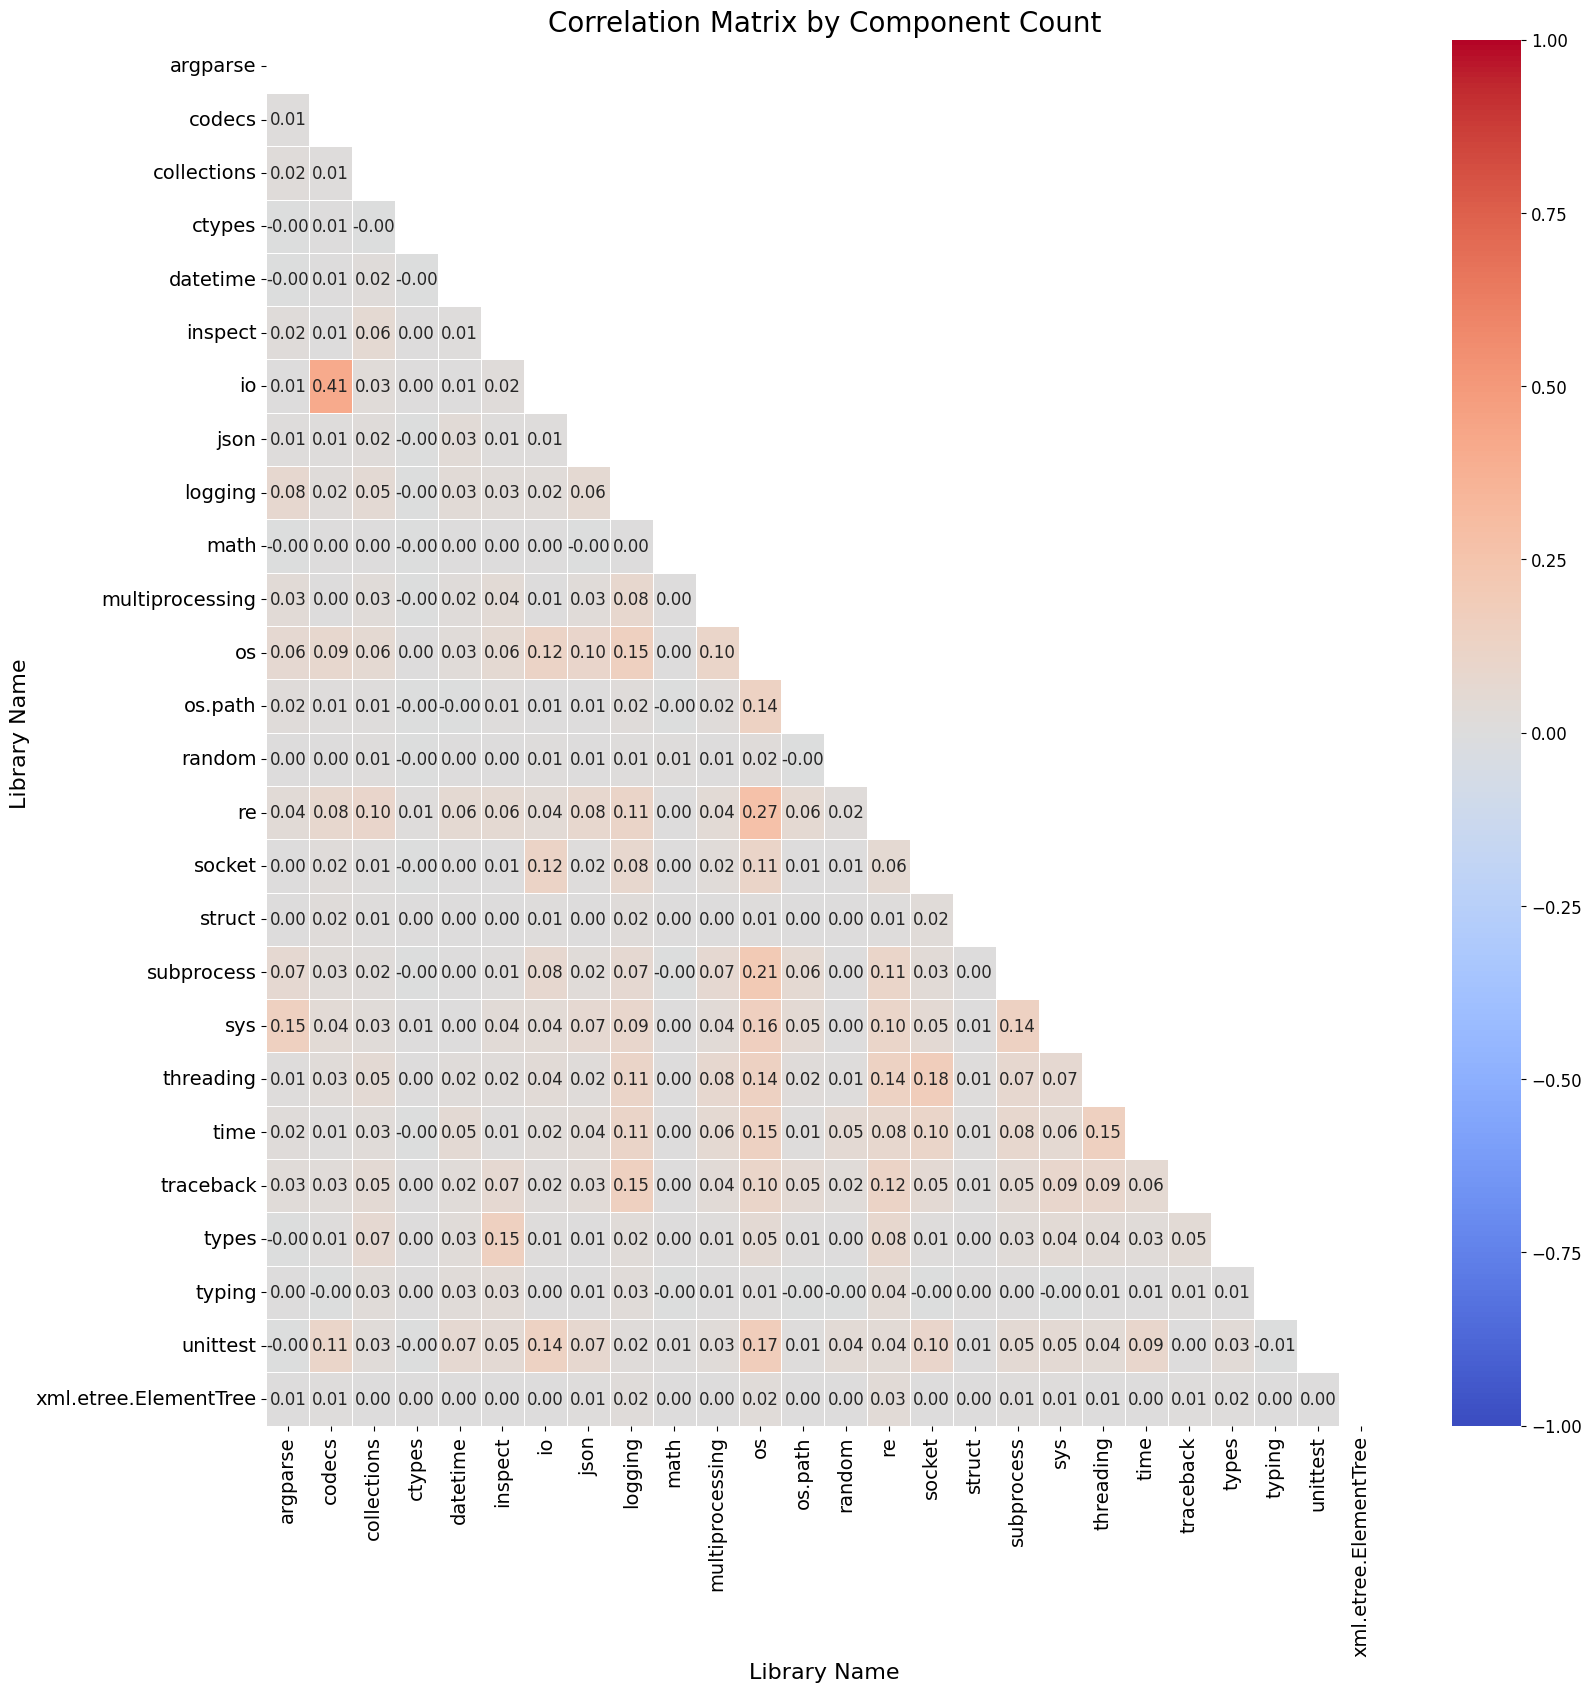

In [37]:
mask = np.triu(np.ones_like(correlation_matrix_above_1_prc_by_componentcount, dtype=bool))

plt.figure(figsize=(18, 18))
sns.heatmap(correlation_matrix_above_1_prc_by_componentcount, mask=mask, annot=True, annot_kws={'size': 12}, cmap='coolwarm', linewidths=0.5, fmt='.2f', vmin=-1, vmax=1)
plt.title(r"Correlation Matrix by Component Count")
plt.ylabel("Library Name")
plt.xlabel("Library Name")
plt.xticks(rotation=90, fontsize=14)
plt.yticks(rotation=0, fontsize=14)
plt.show()

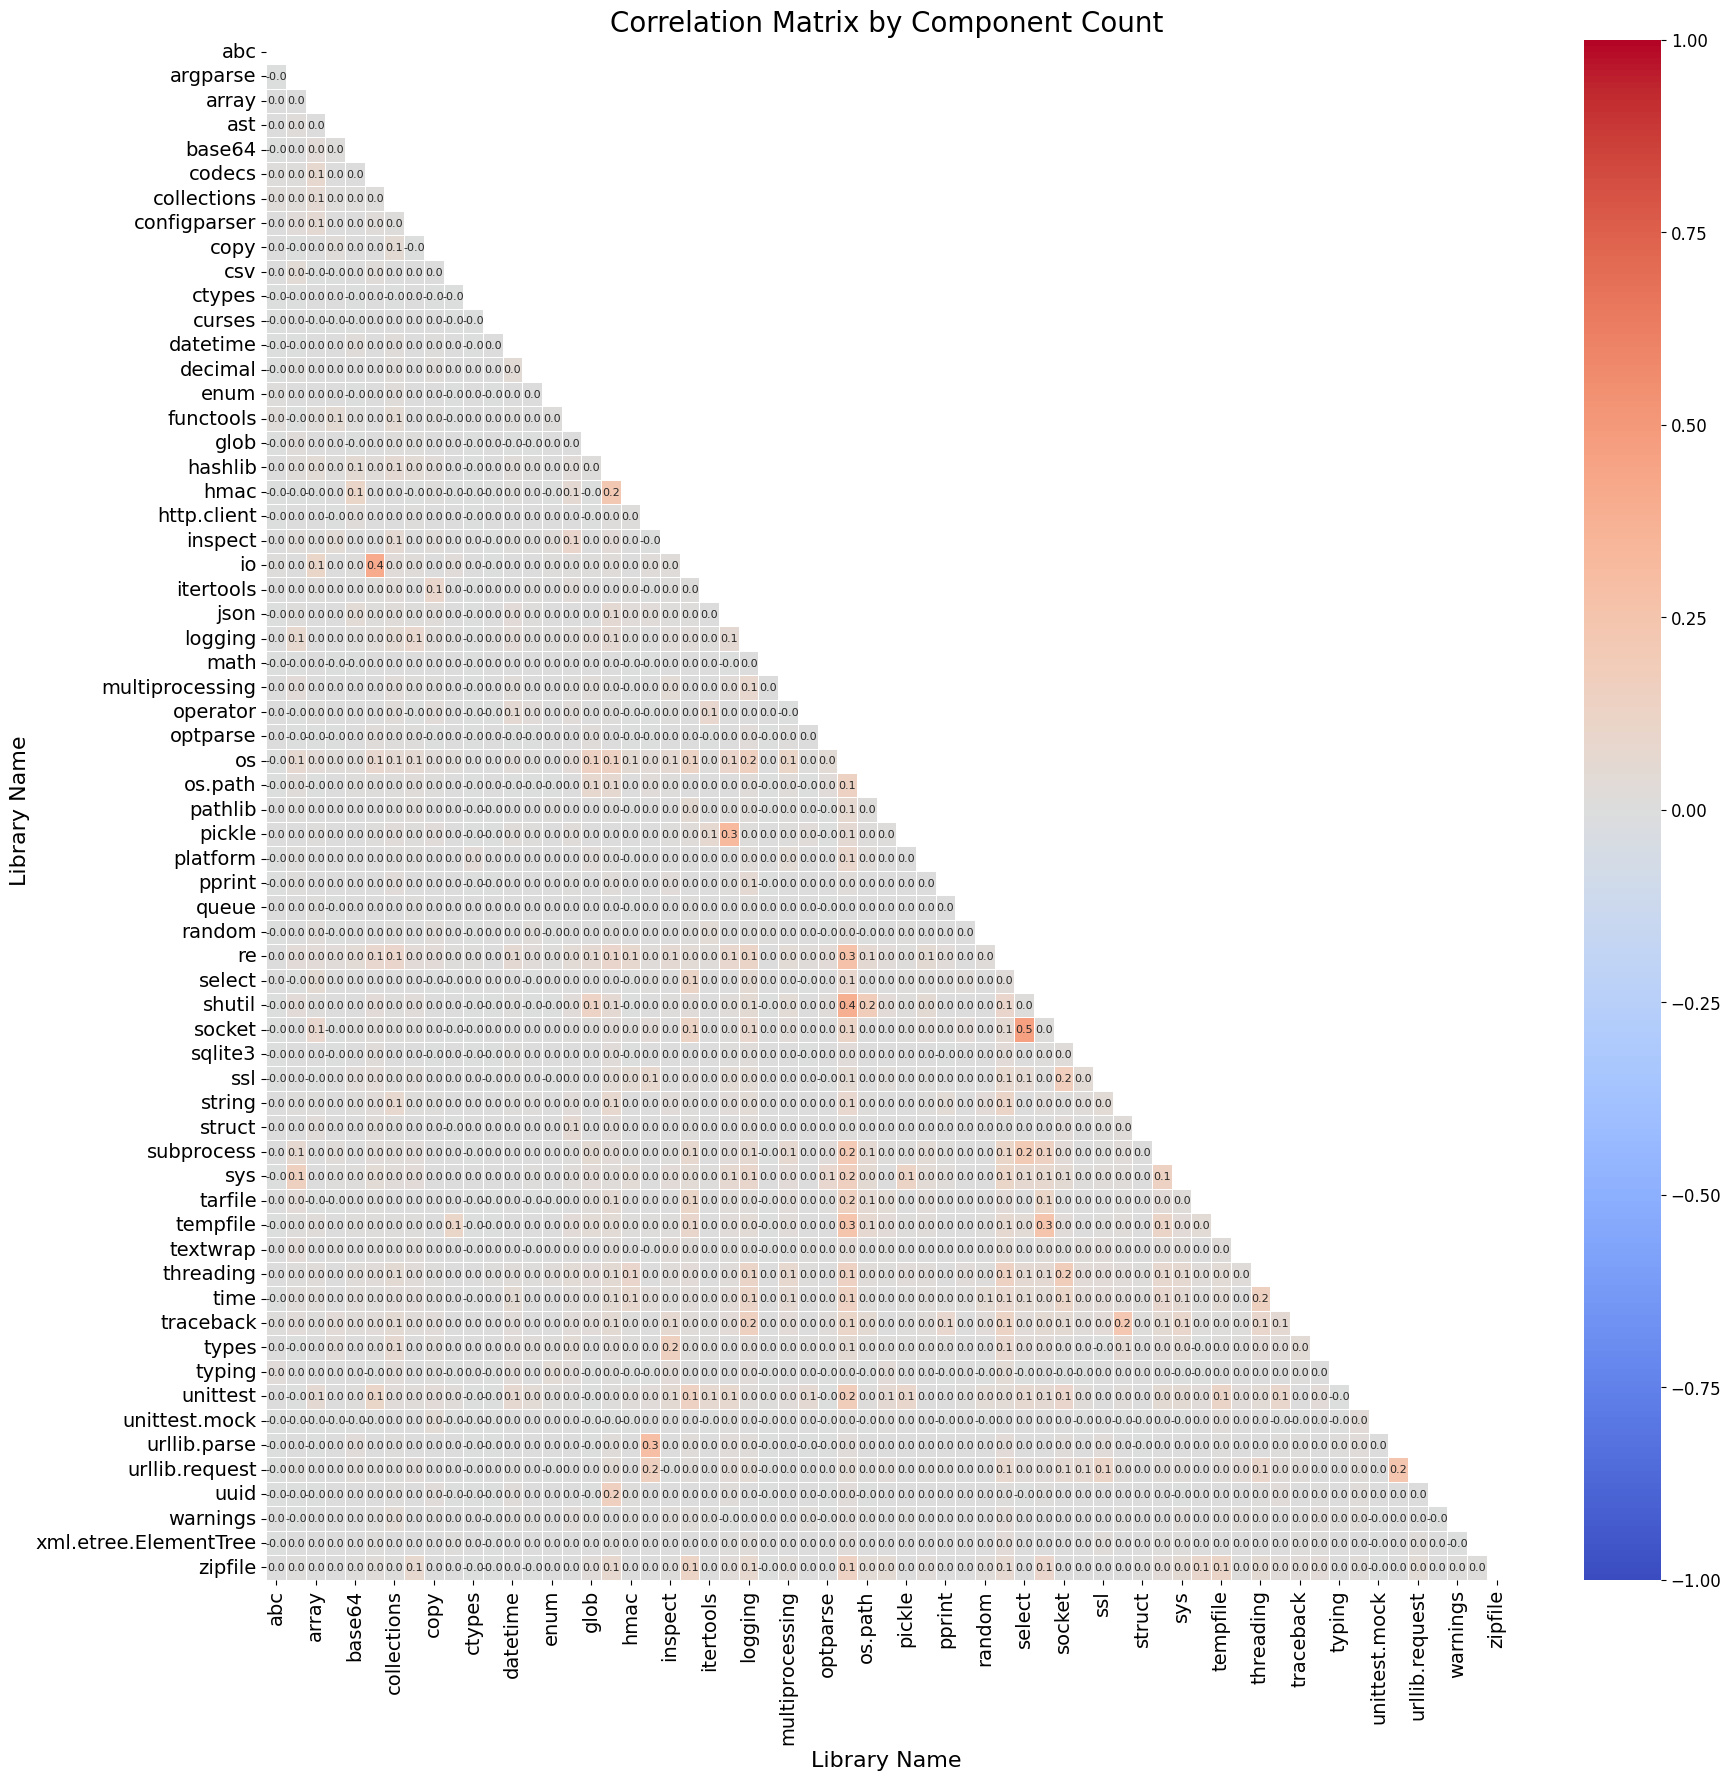

In [38]:
mask = np.triu(np.ones_like(correlation_matrix_above_01_prc_by_componentcount, dtype=bool))

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix_above_01_prc_by_componentcount, mask=mask, annot=True, annot_kws={'size': 8}, cmap='coolwarm', linewidths=0.5, fmt='.1f', vmin=-1, vmax=1)
plt.title(r"Correlation Matrix by Component Count")
plt.ylabel("Library Name")
plt.xlabel("Library Name")
plt.xticks(rotation=90, fontsize=14)
plt.yticks(rotation=0, fontsize=14)
plt.show()

#### By Number of Files in Which Libraries Were Used 

In [39]:
libraries_small = libraries[['chunk_id', 'library_name']].drop_duplicates()
libraries_pivot = libraries_small.pivot_table(index='chunk_id', columns='library_name', aggfunc=len, fill_value=0)
libraries_binary = libraries_pivot.applymap(lambda x: 1 if x > 0 else 0)
libraries_binary

library_name                              _thread  abc  aifc  argparse  array  \
chunk_id                                                                        
0000081255acf04f13c1c84f4e86f7410a5bd792        0    0     0         0      0   
00000eec027d380439a62cf403242855f96f3867        0    0     0         0      0   
0000136d1c63e78b3ab59641a7146a60da2c919e        0    0     0         0      0   
0000138611e4779ad8f368689b4c28f7a6a6ee1a        0    0     0         0      0   
000014207524492ac0b6c407d99d481d00e3dc3c        0    0     0         0      0   
...                                           ...  ...   ...       ...    ...   
ffffe8b423a586793ee52aa7099e20f8a0758e7b        0    0     0         0      0   
ffffeb99a75ba02cc350f3fb587cf05aaf8543fa        0    0     0         0      0   
ffffebdb4ab741c9f40872a832bac4d66d879522        0    0     0         0      0   
fffff44a72b9d75ae9d62414d15f2e3d61c4b7c5        0    0     0         0      0   
fffff95467ad0cd33bdb7f041a99a44ec3649538        0    0     0         0      0   

library_name                              ast  asynchat  asyncore  atexit  \
chunk_id                                                                    
0000081255acf04f13c1c84f4e86f7410a5bd792    0         0         0       0   
00000eec027d380439a62cf403242855f96f3867    0         0         0       0   
0000136d1c63e78b3ab59641a7146a60da2c919e    0         0         0       0   
0000138611e4779ad8f368689b4c28f7a6a6ee1a    0         0         0       0   
000014207524492ac0b6c407d99d481d00e3dc3c    0         0         0       0   
...                                       ...       ...       ...     ...   
ffffe8b423a586793ee52aa7099e20f8a0758e7b    0         0         0       0   
ffffeb99a75ba02cc350f3fb587cf05aaf8543fa    0         0         0       0   
ffffebdb4ab741c9f40872a832bac4d66d879522    0         0         0       0   
fffff44a72b9d75ae9d62414d15f2e3d61c4b7c5    0         0         0       0   
fffff95467ad0cd33bdb7f041a99a44ec3649538    0         0         0       0   

library_name                              audioop  ...  xml.sax.handler  \
chunk_id                                           ...                    
0000081255acf04f13c1c84f4e86f7410a5bd792        0  ...                0   
00000eec027d380439a62cf403242855f96f3867        0  ...                0   
0000136d1c63e78b3ab59641a7146a60da2c919e        0  ...                0   
0000138611e4779ad8f368689b4c28f7a6a6ee1a        0  ...                0   
000014207524492ac0b6c407d99d481d00e3dc3c        0  ...                0   
...                                           ...  ...              ...   
ffffe8b423a586793ee52aa7099e20f8a0758e7b        0  ...                0   
ffffeb99a75ba02cc350f3fb587cf05aaf8543fa        0  ...                0   
ffffebdb4ab741c9f40872a832bac4d66d879522        0  ...                0   
fffff44a72b9d75ae9d62414d15f2e3d61c4b7c5        0  ...                0   
fffff95467ad0cd33bdb7f041a99a44ec3649538        0  ...                0   

library_name                              xml.sax.saxutils  xml.sax.xmlreader  \
chunk_id                                                                        
0000081255acf04f13c1c84f4e86f7410a5bd792                 0                  0   
00000eec027d380439a62cf403242855f96f3867                 0                  0   
0000136d1c63e78b3ab59641a7146a60da2c919e                 0                  0   
0000138611e4779ad8f368689b4c28f7a6a6ee1a                 0                  0   
000014207524492ac0b6c407d99d481d00e3dc3c                 0                  0   
...                                                    ...                ...   
ffffe8b423a586793ee52aa7099e20f8a0758e7b                 0                  0   
ffffeb99a75ba02cc350f3fb587cf05aaf8543fa                 0                  0   
ffffebdb4ab741c9f40872a832bac4d66d879522                 0                  0   
fffff44a72b9d75ae9d62414d15f2e3d61c4b7c5                 0                  0

In [40]:
column_percents_by_filecount = libraries_binary.sum() / libraries_binary.sum().sum()
libraries_binary_above_1_prc_by_filecount = libraries_binary.loc[:, column_percents_by_filecount > 0.01]
correlation_matrix_above_1_prc_by_filecount = libraries_binary_above_1_prc_by_filecount.corr()

libraries_binary_above_01_prc_by_filecount = libraries_binary.loc[:, column_percents_by_filecount > 0.001]
correlation_matrix_above_01_prc_by_filecount = libraries_binary_above_01_prc_by_filecount.corr()

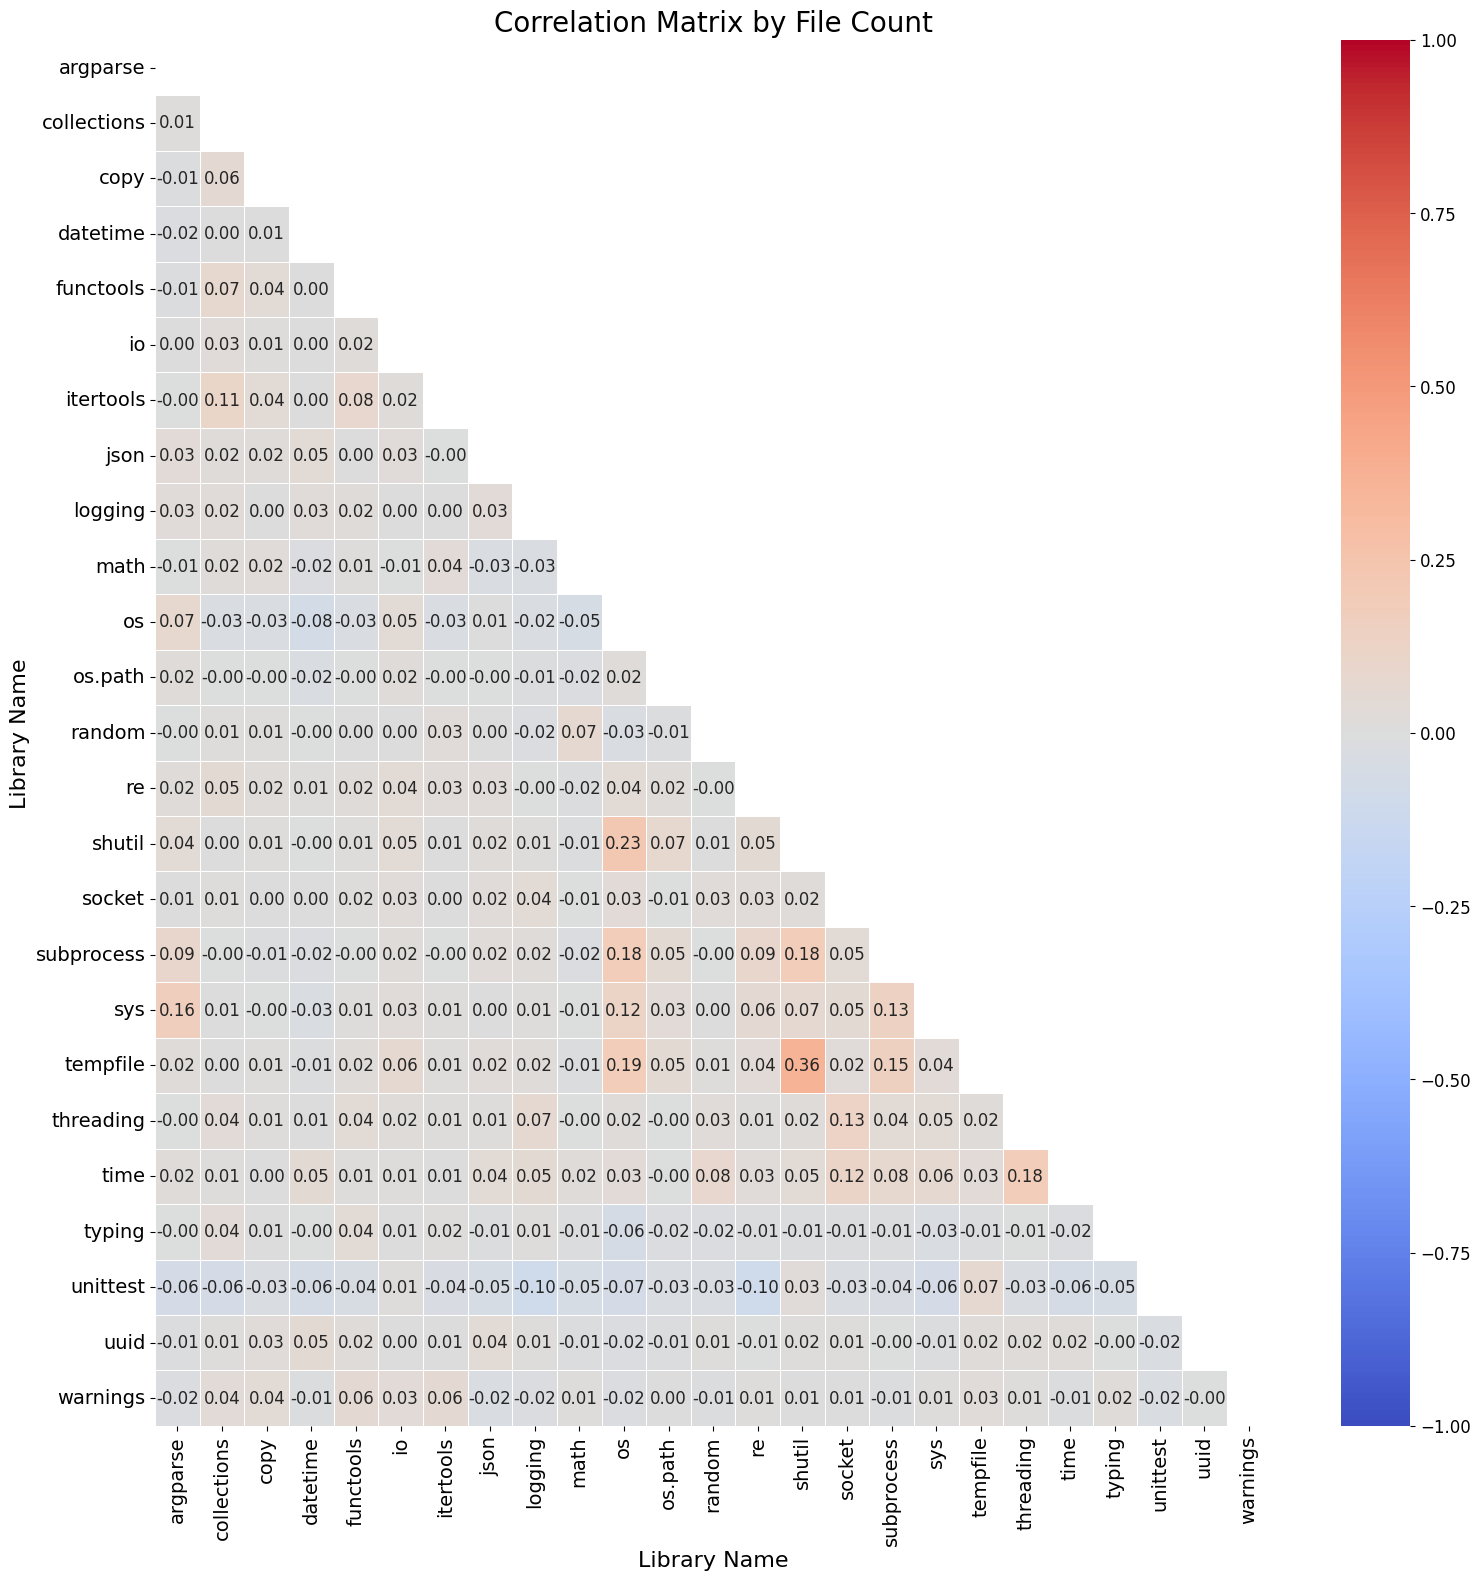

In [41]:
mask = np.triu(np.ones_like(correlation_matrix_above_1_prc_by_filecount, dtype=bool))

plt.figure(figsize=(18, 18))
sns.heatmap(correlation_matrix_above_1_prc_by_filecount, mask=mask, annot=True, annot_kws={'size': 12}, cmap='coolwarm', linewidths=0.5, fmt='.2f', vmin=-1, vmax=1)
plt.title(r"Correlation Matrix by File Count")
plt.ylabel("Library Name")
plt.xlabel("Library Name")
plt.xticks(rotation=90, fontsize=14)
plt.yticks(rotation=0, fontsize=14)
plt.show()

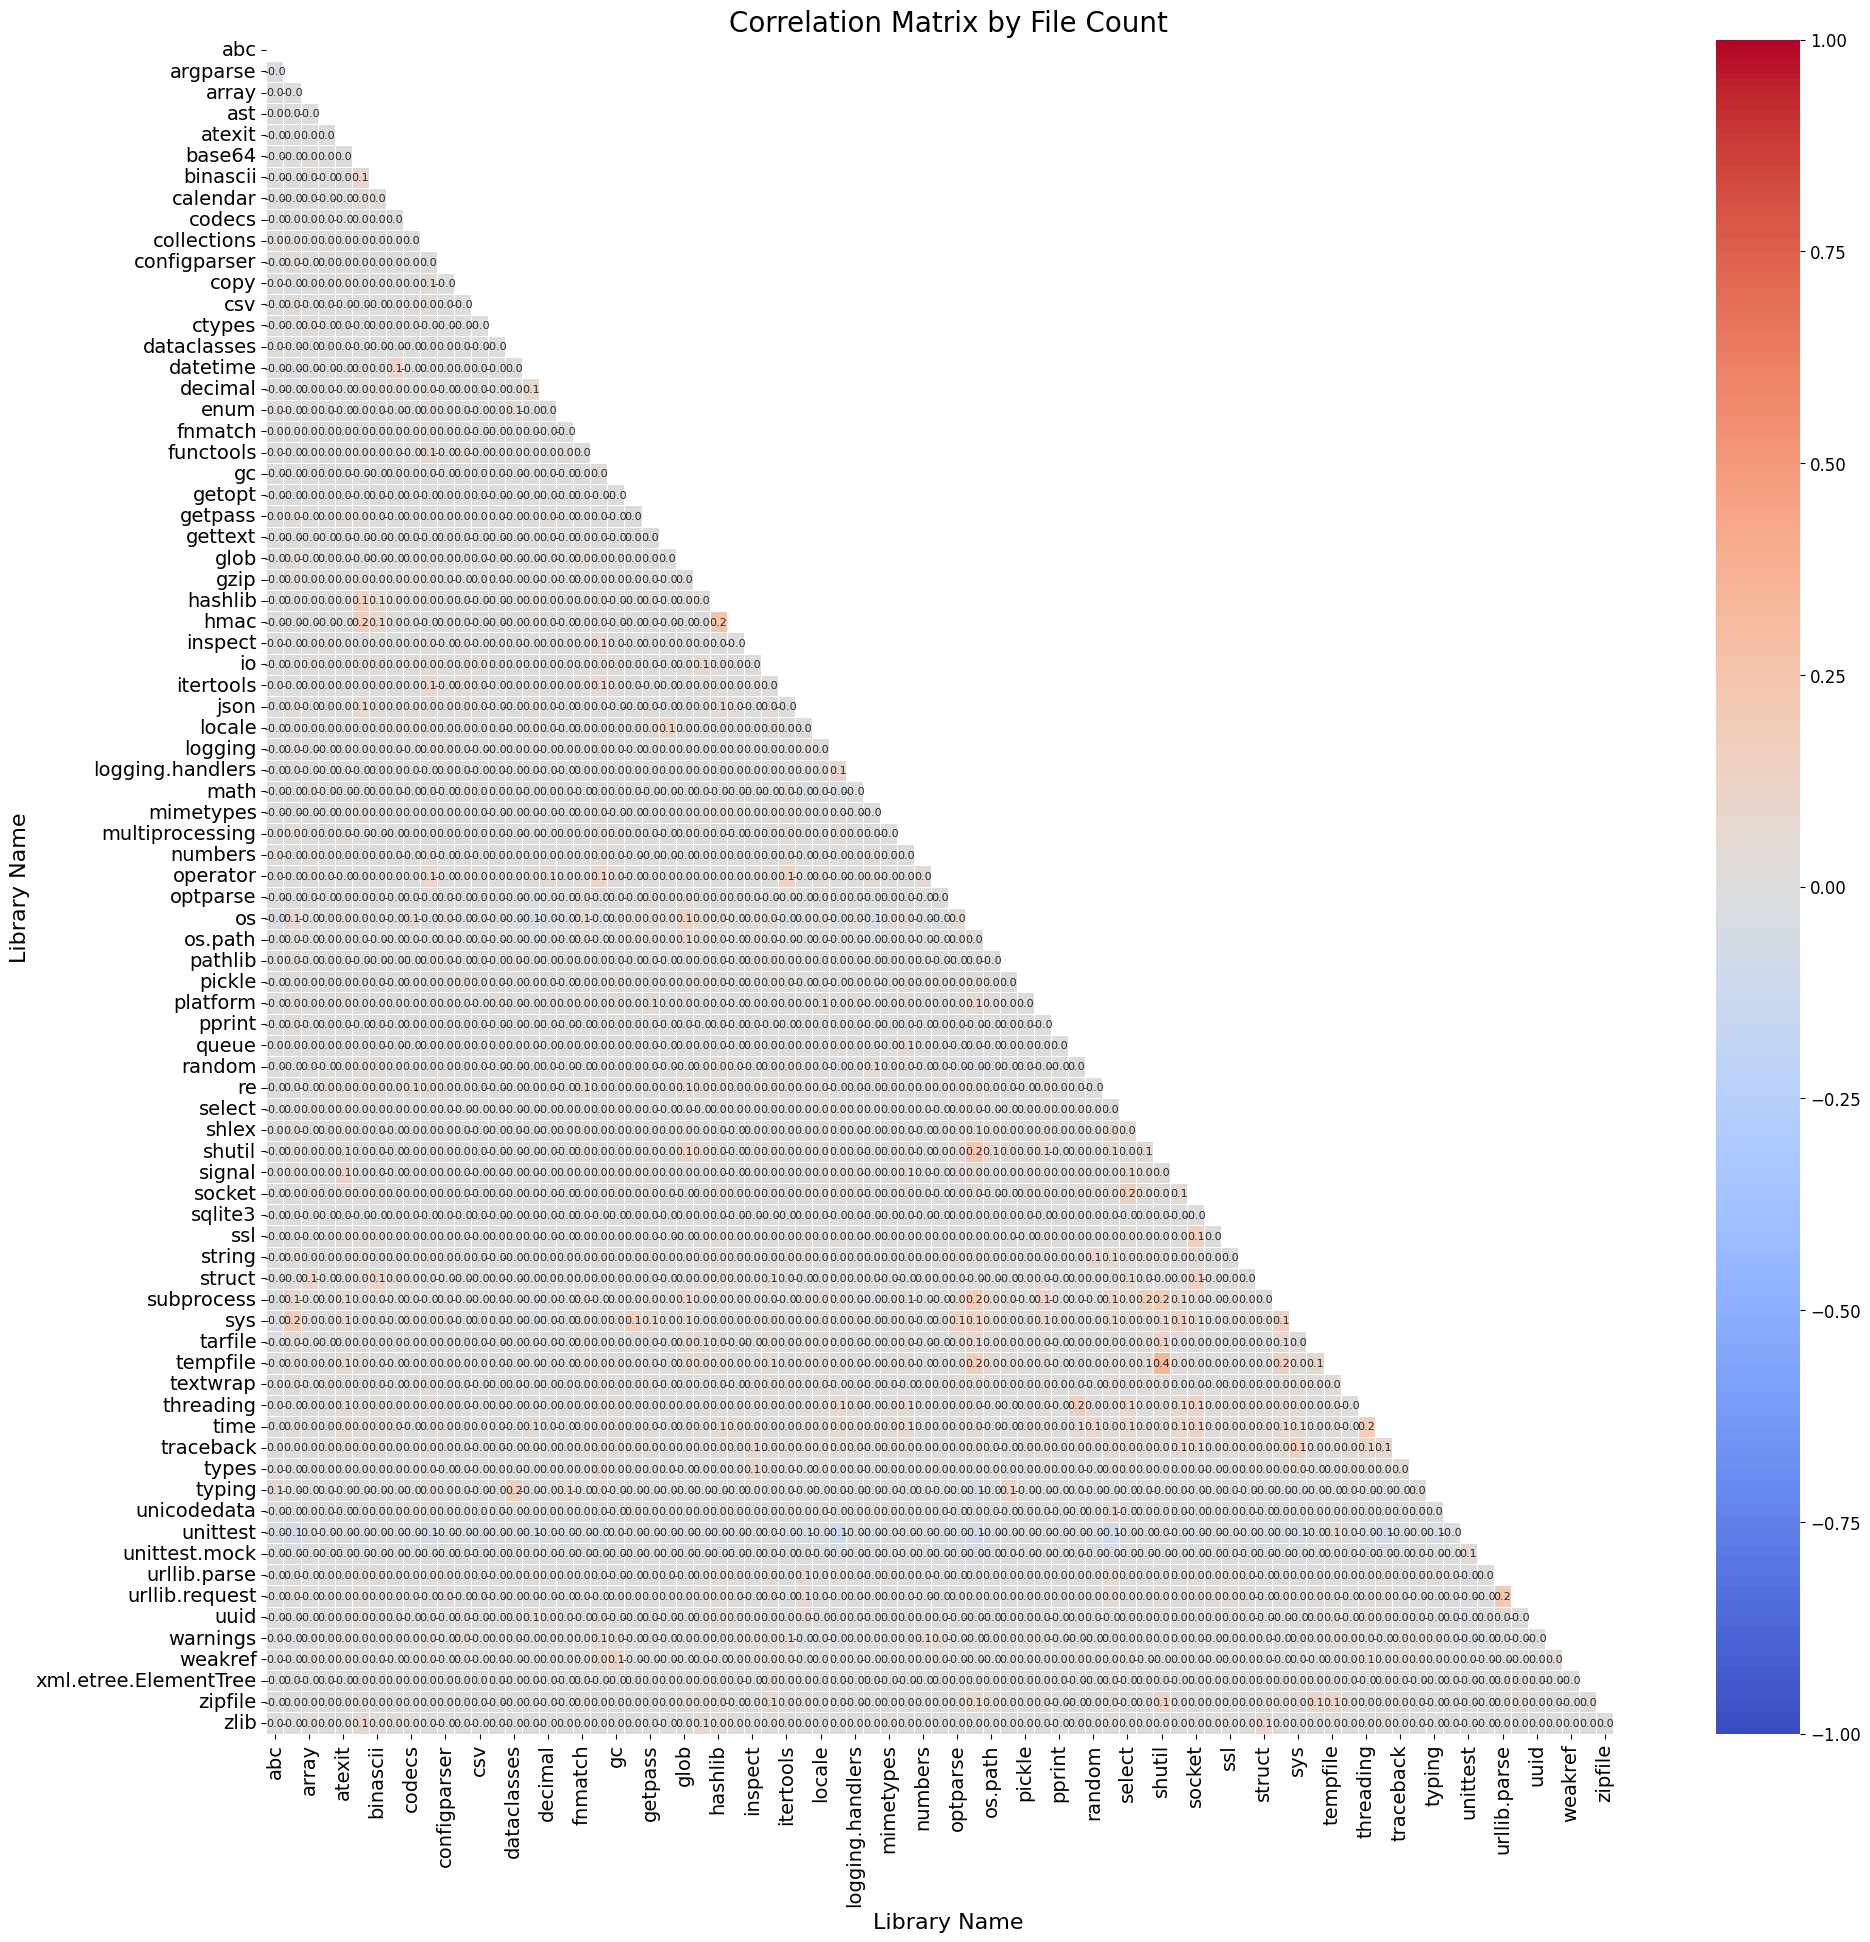

In [42]:
mask = np.triu(np.ones_like(correlation_matrix_above_01_prc_by_filecount, dtype=bool))

plt.figure(figsize=(22, 22))
sns.heatmap(correlation_matrix_above_01_prc_by_filecount, mask=mask, annot=True, annot_kws={'size': 8}, cmap='coolwarm', linewidths=0.5, fmt='.1f', vmin=-1, vmax=1)
plt.title(r"Correlation Matrix by File Count")
plt.ylabel("Library Name")
plt.xlabel("Library Name")
plt.xticks(rotation=90, fontsize=14)
plt.yticks(rotation=0, fontsize=14)
plt.show()

## Mean Complexity of Code Files by Library Used in Them

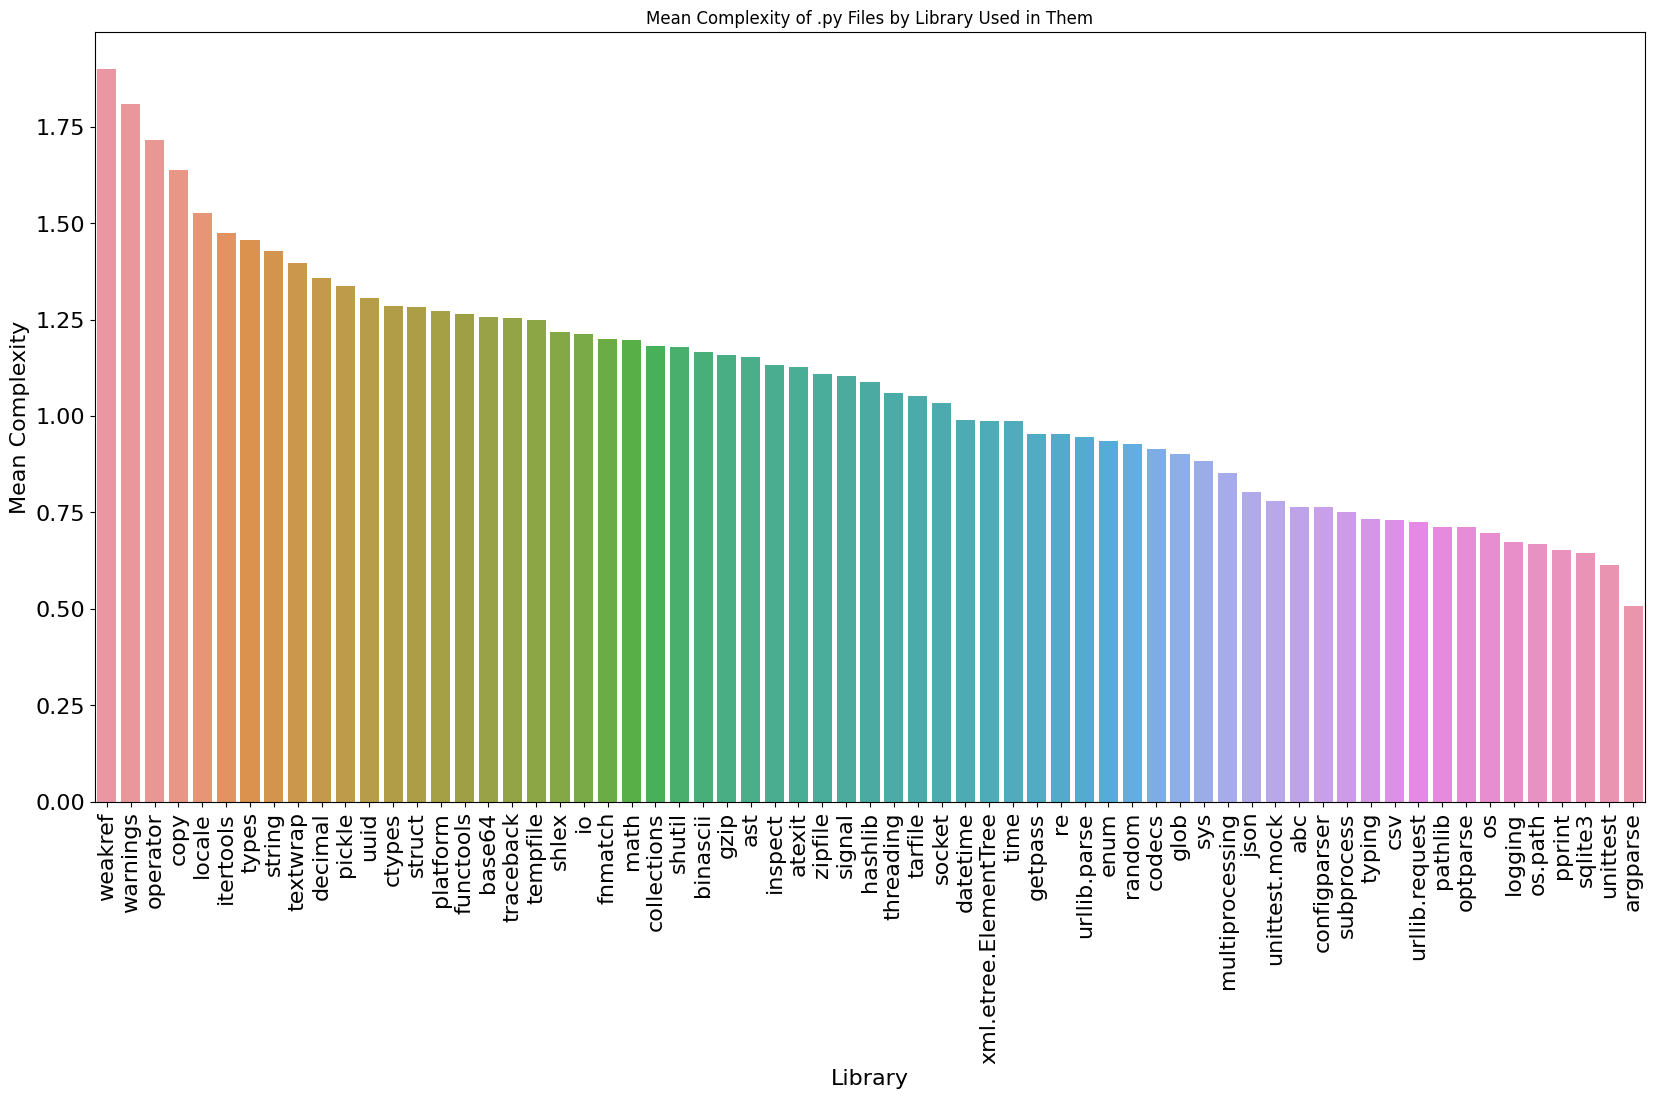

In [6]:
plot_mean_complexity(libraries_py, metadata, 10000, 'Mean Complexity of .py Files by Library Used in Them')

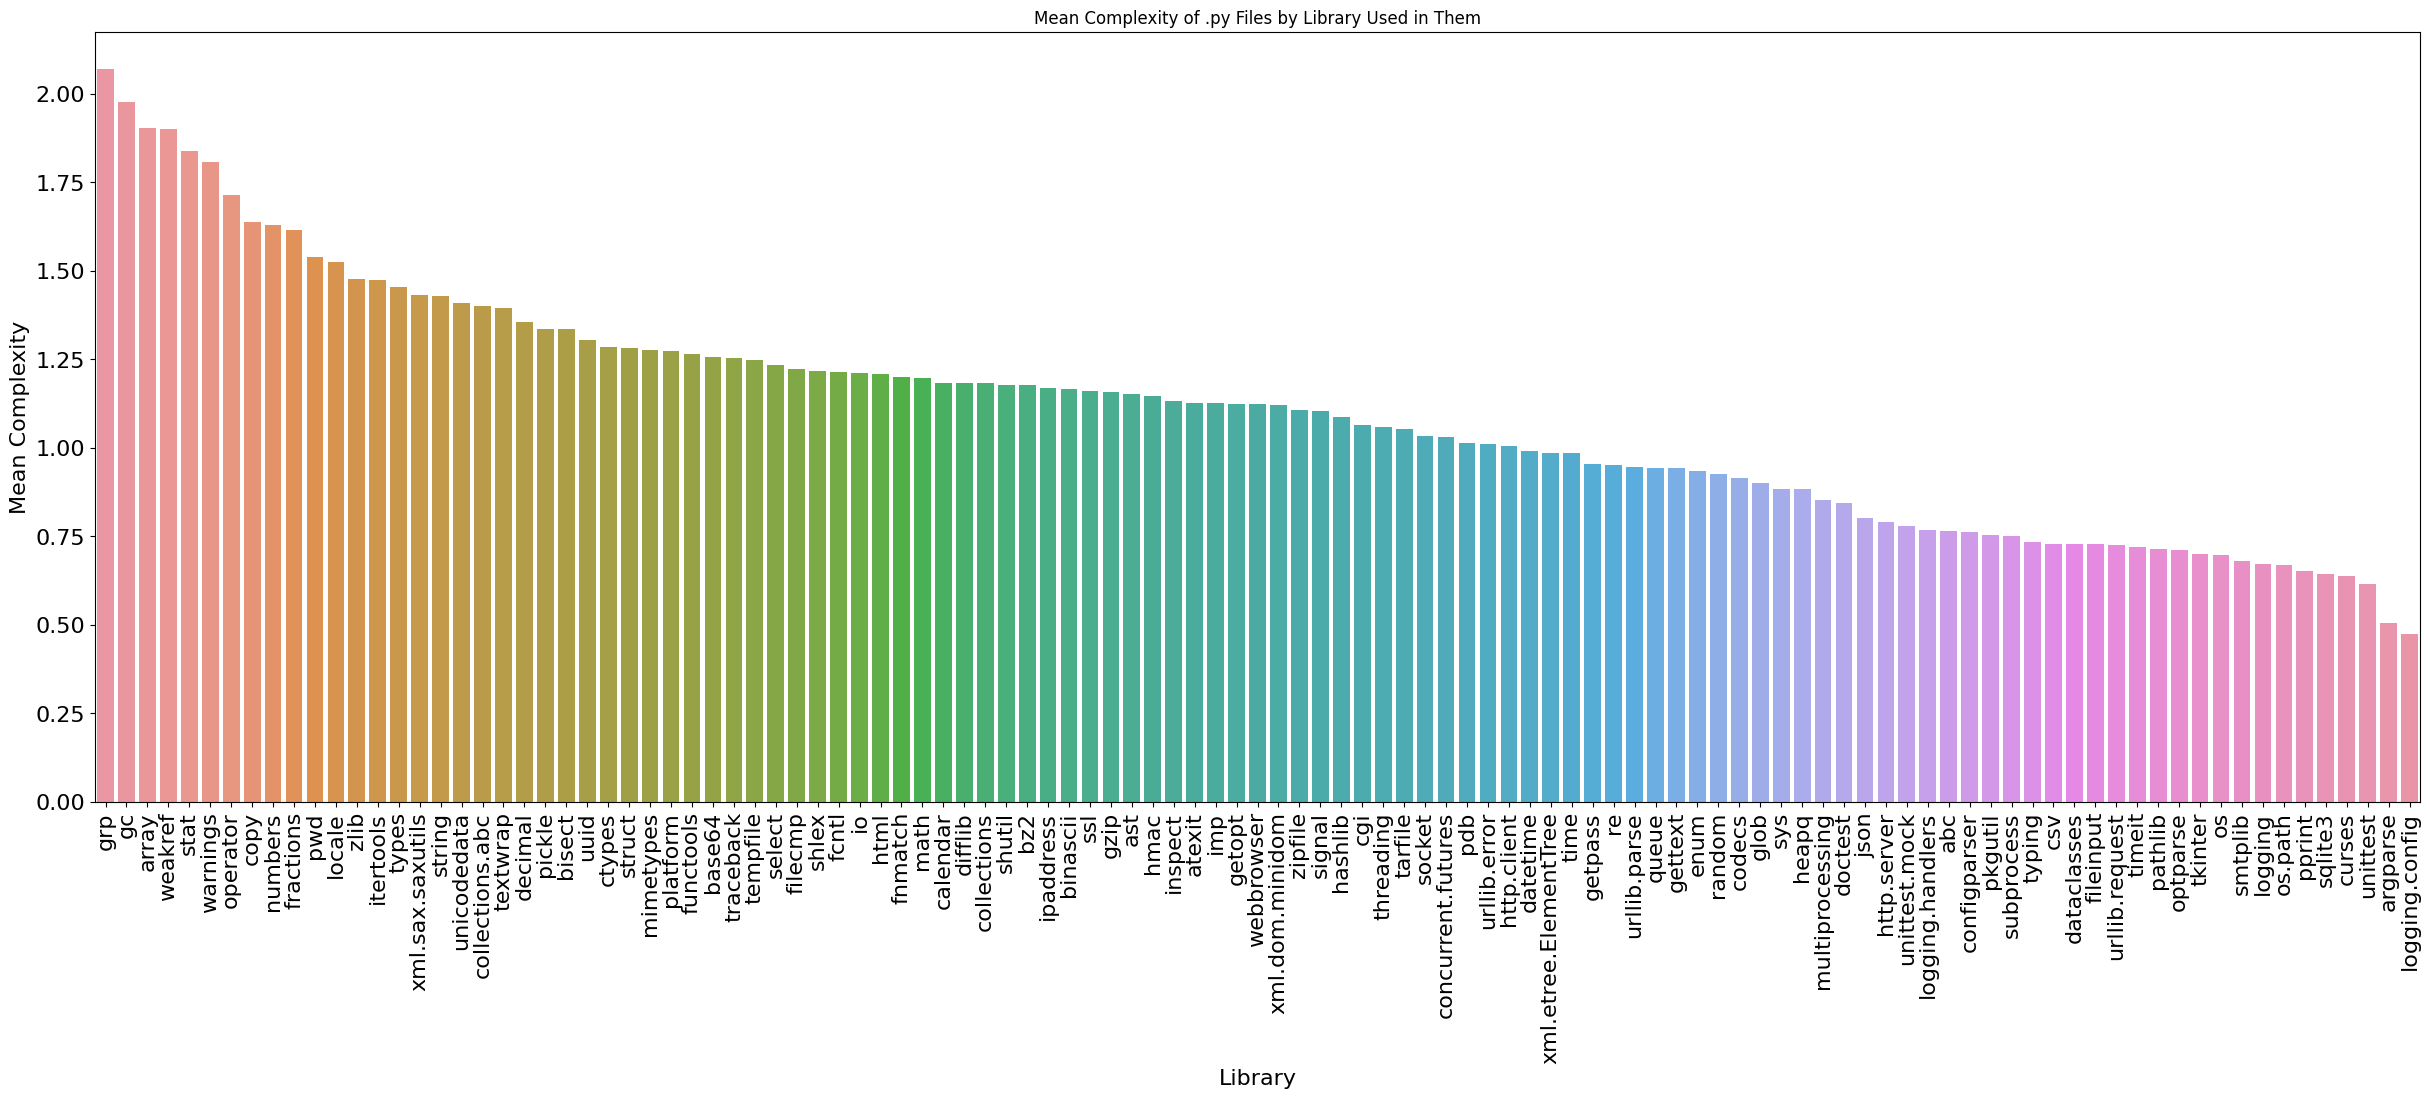

In [5]:
plot_mean_complexity(libraries_py, metadata, 2000, 'Mean Complexity of .py Files by Library Used in Them', figsize=(30, 10))

In [6]:
!jupyter nbconvert --to html std_library_analysis.ipynb

[NbConvertApp] Converting notebook std_library_analysis.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 17 image(s).
[NbConvertApp] Writing 7778604 bytes to std_library_analysis.html
